In [1]:
#Importing Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt             # Altair is a declarative statistical visualization library for Python
alt.renderers.enable('default')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("ResourcesV01/CustomerDataV03.csv")
df.head(5)

customer_ID prefix first_name last_name generationalSuffix  \
0  01GZ1HY1MDYF1DF31PYTRFGAM7    Dr.      Ebony   Treneer                 II   
1  01GZ1HY1MV8PBTH9D67Q7MZDB6    Mr.     Ashley     Naper                NaN   
2  01GZ1HY1MYD1ZF54KTWVHMFFCY    NaN     Josias       NaN                 IV   
3  01GZ1HY1N5Z506EPJGKE1ACJ1H    NaN        NaN       NaN                NaN   
4  01GZ1HY1N8BED1013ZEPWH71NS    NaN        NaN       NaN                 II   

  suffixTitle                CompleteName              gender  \
0         EdD    Dr. Ebony Treneer II,EdD           Androgyne   
1         MFA       Mr. Ashley Naper ,MFA  Transsexual Person   
2         PhD      Dr. Josias Ohms IV,PhD           Cis Woman   
3         MFA   Prof. Garnette Copyn ,MFA         Genderqueer   
4         DPT  Mr. Curry Wetherald II,DPT        Trans Female   

                       email  Address1  ... Annual_Income Largest_Bill_Amount  \
0                        NaN  Apt 1420  ...        575017                 NaN   
1                        NaN       NaN  ...        792184                 NaN   
2      josias.ohms@pilog.com   Apt 423  ...        898189             71912.0   
3   garnette.copyn@pilog.com  Suite 39  ...        686375             54510.0   
4  curry.wetherald@pilog.com  Suite 85  ...        321122             46970.0   

  Mean_Transaction_Amount              Transaction_ID Last_Transaction  \
0                     NaN  01GZ1HY1MSNCARAEESBGGZPVA0          6/24/21   
1                     NaN  01GZ1HY1MX4APCMBGAVDB6TY8K          9/23/22   
2                     NaN  01GZ1HY1N4W70FD3J835S4TJQA         10/17/20   
3                     NaN  01GZ1HY1N7V826HFFYB5AJ44G4          1/11/23   
4                     NaN  01GZ1HY1NB6KHM4C7Q12GCANTK           3/5/22   

  customer_Since                   IntBankAccNo  CreditcardNo  \
0        2/11/02    GB70 IDWQ 3595 8675 9760 62  4.040000e+15   
1         3/5/12       EE32 8732 5283 4033 8368  3.550000e+15   
2        3/21/95   AE23 3075 9822 1306 9979 392  3.550000e+15   
3         1/7/92  ES53 6006 0384 5093 8069 9794  2.020000e+14   
4        5/30/09    GE89 PB68 3087 7536 0607 19  3.540000e+15   

       CreditCard_type    password  
0                 visa  prRtRAjIth  
1                  jcb     WS5eXHK  
2                  jcb    0dDBzT8D  
3  diners-club-enroute     EVeRBma  
4                  jcb     XJyZBn9  

[5 rows x 33 columns]

### Creating the column for Date of Birth  with inconsistent format

In [3]:
import datetime
import random
formats = ['%m/%d/%Y', '%m/%d/%y', '%d/%m/%Y', '', '%d/%m/%y', '%d-%m-%Y', '%d-%m-%y', '%m-%d-%Y', '', '%m-%d-%y', '%Y-%m-%d', '%b %e, %Y', '', '%B %e, %Y', '%b %d, %Y', '', '%B %d, %Y', '%Y-%m-%d %H:%M:%S']
dataset = []
for i in range(1000):
    date_string = random.choice(formats)
    date_obj = datetime.datetime.strptime('01/01/1960', '%m/%d/%Y') + datetime.timedelta(days=random.randint(1, 25000)) # gen a random no of days between 1 and 25,000 (approx 68 years), which from January 1, 1960,
    dataset.append((date_obj.strftime(date_string)))
df['DOB'] = dataset
df.drop(['Birth_Date'], axis=1)
# df.to_csv('updated_DOB.csv', index=False)

customer_ID prefix first_name last_name  \
0    01GZ1HY1MDYF1DF31PYTRFGAM7    Dr.      Ebony   Treneer   
1    01GZ1HY1MV8PBTH9D67Q7MZDB6    Mr.     Ashley     Naper   
2    01GZ1HY1MYD1ZF54KTWVHMFFCY    NaN     Josias       NaN   
3    01GZ1HY1N5Z506EPJGKE1ACJ1H    NaN        NaN       NaN   
4    01GZ1HY1N8BED1013ZEPWH71NS    NaN        NaN       NaN   
..                          ...    ...        ...       ...   
995  01GZ1HY1WPWBA18GXP0429BF0Q  Prof.        NaN       NaN   
996  01GZ1HY1WSE22J7H29QXM0KEV8  Prof.    Alfonso       NaN   
997  01GZ1HY1WW6N4TT543Y0GVCGTG    Mr.      Bonni    Scurry   
998  01GZ1HY1X19AAFE4SAB1WKNKYY  Prof.    Elfreda      Bent   
999  01GZ1HY1X4E0SNHACYD2R29NSX    Mr.    Ellissa    Magson   

    generationalSuffix suffixTitle                     CompleteName  \
0                   II         EdD         Dr. Ebony Treneer II,EdD   
1                  NaN         MFA            Mr. Ashley Naper ,MFA   
2                   IV         PhD           Dr. Josias Ohms IV,PhD   
3                  NaN         MFA        Prof. Garnette Copyn ,MFA   
4                   II         DPT       Mr. Curry Wetherald II,DPT   
..                 ...         ...                              ...   
995                NaN      PharmD  Prof. Carmelina Muckeen ,PharmD   
996                NaN          MA         Prof. Alfonso Odhams ,MA   
997                 II        IQCP         Mr. Bonni Scurry II,IQCP   
998                NaN         NaN             Prof. Elfreda Bent ,   
999                NaN         EdD          Mr. Ellissa Magson ,EdD   

                 gender                      email   Address1  ...  \
0             Androgyne                        NaN   Apt 1420  ...   
1    Transsexual Person                        NaN        NaN  ...   
2             Cis Woman      josias.ohms@pilog.com    Apt 423  ...   
3           Genderqueer   garnette.copyn@pilog.com   Suite 39  ...   
4          Trans Female  curry.wetherald@pilog.com   Suite 85  ...   
..                  ...                        ...        ...  ...   
995      Male to Female                        NaN   Room 141  ...   
996                 Cis                        NaN   Suite 74  ...   
997           Trans Man     bonni.scurry@pilog.com   Suite 38  ...   
998           Androgyne                        NaN    Apt 947  ...   
999            Neutrois   ellissa.magson@pilog.com  Room 1157  ...   

    Largest_Bill_Amount Mean_Transaction_Amount              Transaction_ID  \
0                   NaN                     NaN  01GZ1HY1MSNCARAEESBGGZPVA0   
1                   NaN                     NaN  01GZ1HY1MX4APCMBGAVDB6TY8K   
2               71912.0                     NaN  01GZ1HY1N4W70FD3J835S4TJQA   
3               54510.0                     NaN  01GZ1HY1N7V826HFFYB5AJ44G4   
4               46970.0                     NaN  01GZ1HY1NB6KHM4C7Q12GCANTK   
..                  ...                     ...                         ...   
995                 NaN                     NaN  01GZ1HY1WRQA0TVGC01F7NAK7C   
996                 NaN                     NaN  01GZ1HY1WV7JPJ5MFEV8PA0G2J   
997             97980.0                     NaN  01GZ1HY1X03FWFD5VB10YDPH29   
998                 NaN                     NaN  01GZ1HY1X3K3977TFEW23TFK7V   
999             25321.0                     NaN  01GZ1HY1X67QFR477620K9CDR2   

     Last_Transaction customer_Since                        IntBankAccNo  \
0             6/24/21        2/11/02         GB70 IDWQ 3595 8675 9760 62   
1             9/23/22         3/5/12            EE32 8732 5283 4033 8368   
2            10/17/20        3/21/95        AE23 3075 9822 1306 9979 392   
3             1/11/23         1/7/92       ES53 6006 0384 5093 8069 9794   
4              3/5/22        5/30/09         GE89 PB68 3087 7536 0607 19   
..                ...            ...                                 ...   
995           4/24/22        5/18/98                 BE07 3844 4595 4602   
996         

### Creating the column for Mobile Column with inconsistent format

In [4]:
import random
formats = ['###-###-####', '(###)#######', '(###) ###-####', '', '(###)-###-####', '###.###.####', '1+##########', '1+(###) ###-####', '', '### ### ####', '##########', '###*###*####', '(###) ###.####', '###-#######', '###.#######', '', '(###) #######', '(###)###-####', '']
dataset = []
for i in range(1000):
    phone_number = ''
    phone_format = random.choice(formats)
    for char in phone_format:
        if char == '#':
            phone_number += str(random.randint(0, 9))
        else:
            phone_number += char
    dataset.append(phone_number)
df['mobile'] = dataset
# df.to_csv('updated_Mobile.csv', index=False)

### Creating the column for SSN  with inconsistent format

In [5]:
import random
formats = ['###-###-####', '(###)#######', '(###) ###-####', '', '(###)-###-####', '###.###.####', '##########', '(###) ###-####', '', '### ### ####', '##########', '###*###*####', '', '(###) ###.####', '###-#######', '###.#######', '', '(###) #######', '(###)###-####']
dataset = []
for i in range(1000):
    ssn = ''
    phone_format = random.choice(formats)
    for char in phone_format:
        if char == '#':
            ssn += str(random.randint(0, 9))
        else:
            ssn += char
    dataset.append(ssn)
df['ssn'] = dataset
df.drop(df.columns[[16, 19, 20]], axis=1, inplace=True)
df.to_csv('updated_SSN.csv', index=False)
df.to_csv('ResourcesV01/CustomerDataV04.csv', index=False)

In [6]:
df

customer_ID prefix first_name last_name  \
0    01GZ1HY1MDYF1DF31PYTRFGAM7    Dr.      Ebony   Treneer   
1    01GZ1HY1MV8PBTH9D67Q7MZDB6    Mr.     Ashley     Naper   
2    01GZ1HY1MYD1ZF54KTWVHMFFCY    NaN     Josias       NaN   
3    01GZ1HY1N5Z506EPJGKE1ACJ1H    NaN        NaN       NaN   
4    01GZ1HY1N8BED1013ZEPWH71NS    NaN        NaN       NaN   
..                          ...    ...        ...       ...   
995  01GZ1HY1WPWBA18GXP0429BF0Q  Prof.        NaN       NaN   
996  01GZ1HY1WSE22J7H29QXM0KEV8  Prof.    Alfonso       NaN   
997  01GZ1HY1WW6N4TT543Y0GVCGTG    Mr.      Bonni    Scurry   
998  01GZ1HY1X19AAFE4SAB1WKNKYY  Prof.    Elfreda      Bent   
999  01GZ1HY1X4E0SNHACYD2R29NSX    Mr.    Ellissa    Magson   

    generationalSuffix suffixTitle                     CompleteName  \
0                   II         EdD         Dr. Ebony Treneer II,EdD   
1                  NaN         MFA            Mr. Ashley Naper ,MFA   
2                   IV         PhD           Dr. Josias Ohms IV,PhD   
3                  NaN         MFA        Prof. Garnette Copyn ,MFA   
4                   II         DPT       Mr. Curry Wetherald II,DPT   
..                 ...         ...                              ...   
995                NaN      PharmD  Prof. Carmelina Muckeen ,PharmD   
996                NaN          MA         Prof. Alfonso Odhams ,MA   
997                 II        IQCP         Mr. Bonni Scurry II,IQCP   
998                NaN         NaN             Prof. Elfreda Bent ,   
999                NaN         EdD          Mr. Ellissa Magson ,EdD   

                 gender                      email   Address1  ...  \
0             Androgyne                        NaN   Apt 1420  ...   
1    Transsexual Person                        NaN        NaN  ...   
2             Cis Woman      josias.ohms@pilog.com    Apt 423  ...   
3           Genderqueer   garnette.copyn@pilog.com   Suite 39  ...   
4          Trans Female  curry.wetherald@pilog.com   Suite 85  ...   
..                  ...                        ...        ...  ...   
995      Male to Female                        NaN   Room 141  ...   
996                 Cis                        NaN   Suite 74  ...   
997           Trans Man     bonni.scurry@pilog.com   Suite 38  ...   
998           Androgyne                        NaN    Apt 947  ...   
999            Neutrois   ellissa.magson@pilog.com  Room 1157  ...   

                 Transaction_ID Last_Transaction customer_Since  \
0    01GZ1HY1MSNCARAEESBGGZPVA0          6/24/21        2/11/02   
1    01GZ1HY1MX4APCMBGAVDB6TY8K          9/23/22         3/5/12   
2    01GZ1HY1N4W70FD3J835S4TJQA         10/17/20        3/21/95   
3    01GZ1HY1N7V826HFFYB5AJ44G4          1/11/23         1/7/92   
4    01GZ1HY1NB6KHM4C7Q12GCANTK           3/5/22        5/30/09   
..                          ...              ...            ...   
995  01GZ1HY1WRQA0TVGC01F7NAK7C          4/24/22        5/18/98   
996  01GZ1HY1WV7JPJ5MFEV8PA0G2J          7/19/22         8/7/88   
997  01GZ1HY1X03FWFD5VB10YDPH29          3/20/22         4/6/15   
998  01GZ1HY1X3K3977TFEW23TFK7V         11/28/22         4/2/97   
999  01GZ1HY1X67QFR477620K9CDR2          2/12/20        4/27/06   

                           IntBankAccNo  CreditcardNo      CreditCard_type  \
0           GB70 IDWQ 3595 8675 9760 62  4.040000e+15                 visa   
1              EE32 8732 5283 4033 8368  3.550000e+15                  jcb   
2          AE23 3075 9822 1306 9979 392  3.550000e+15                  jcb   
3         ES53 6006 0384 5093 8069 9794  2.020000e+14  diners-club-enroute   
4           GE89 PB68 3087 7536 0607 19  3.540000e+15                  jcb   
..                                  ...           ...                  ...   
995                 BE07 3844 4595 4602  4.030000e+15        visa-electron   
996            KZ61 839I XN38 8KTA ZEPM  3.540000e+15                  jcb   
997  AL46 8250 3092 JFRK I3BL BQVR OMRP  3.540000e+15         

### Data Profiling in Python
Before we perform any form of data cleansing, there is a need to thoroughly understand the dataset and its anatomy. We can do that through ‘Profiling’.
Data Profiling is the process of obtaining basic statistics about the dataset. This can be done using python library “Pandas”. It provides a broad overview of the entire dataset and a narrow view of individual columns.

In [7]:
#! pip install pandas-profiling
import pandas as pd    #to read data, profile data, convert data into a df
import numpy as np     #for numerical computations, coverting dataset to array, etc
import seaborn as sns  #used to visualize the dataset
import pandas_profiling as pp  #we will profile the dataset to obtain basic statistics

import matplotlib          #a plotting library for the Python & its numerical mathematics extension 'NumPy'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use('ggplot')    #ggplot is a popular ploting style in R but we will use it in matplot too
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #specifying the figure sizes

pd.options.mode.chained_assignment = None   #in case of a warning, this line ignores it (optional)


#Profiling the dataset to obtain basic statistics
# generates the report
data_profile = pp.ProfileReport(df)
# displays the report
data_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_ID              1000 non-null   object 
 1   prefix                   288 non-null    object 
 2   first_name               241 non-null    object 
 3   last_name                202 non-null    object 
 4   generationalSuffix       302 non-null    object 
 5   suffixTitle              226 non-null    object 
 6   CompleteName             883 non-null    object 
 7   gender                   883 non-null    object 
 8   email                    212 non-null    object 
 9   Address1                 806 non-null    object 
 10  Address2                 806 non-null    object 
 11  city                     212 non-null    object 
 12  state                    228 non-null    object 
 13  zipcode                  883 non-null    float64
 14  country                  

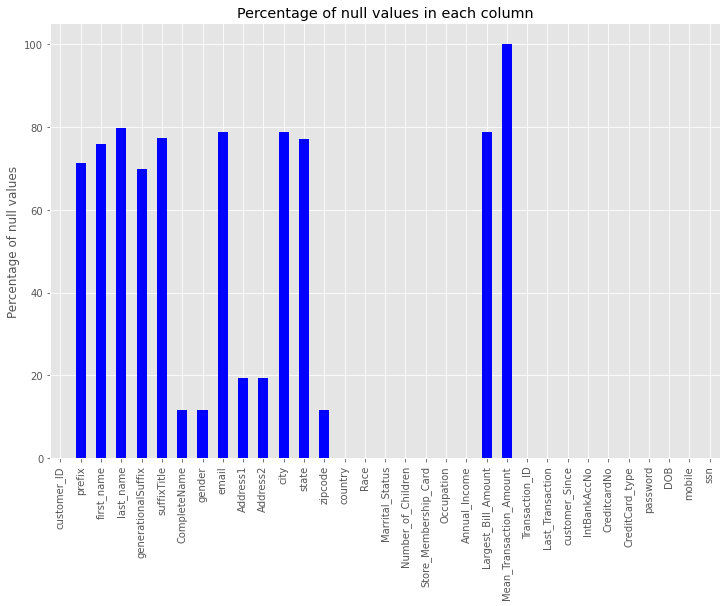

In [10]:
# calculate percentage of null values in each column
null_percentage = df.isnull().mean() * 100
# create a bar plot
null_percentage.plot(kind='bar', color='blue')
# set the plot title and labels
plt.title('Percentage of null values in each column')
# plt.xlabel('Column name')
plt.ylabel('Percentage of null values')
# display the plot
plt.show()

In [11]:
from splink import linker
from splink.duckdb.duckdb_linker import DuckDBLinker
linker = DuckDBLinker(df)
linker.missingness_chart()

In [12]:
df

customer_ID prefix first_name last_name  \
0    01GZ1HY1MDYF1DF31PYTRFGAM7    Dr.      Ebony   Treneer   
1    01GZ1HY1MV8PBTH9D67Q7MZDB6    Mr.     Ashley     Naper   
2    01GZ1HY1MYD1ZF54KTWVHMFFCY    NaN     Josias       NaN   
3    01GZ1HY1N5Z506EPJGKE1ACJ1H    NaN        NaN       NaN   
4    01GZ1HY1N8BED1013ZEPWH71NS    NaN        NaN       NaN   
..                          ...    ...        ...       ...   
995  01GZ1HY1WPWBA18GXP0429BF0Q  Prof.        NaN       NaN   
996  01GZ1HY1WSE22J7H29QXM0KEV8  Prof.    Alfonso       NaN   
997  01GZ1HY1WW6N4TT543Y0GVCGTG    Mr.      Bonni    Scurry   
998  01GZ1HY1X19AAFE4SAB1WKNKYY  Prof.    Elfreda      Bent   
999  01GZ1HY1X4E0SNHACYD2R29NSX    Mr.    Ellissa    Magson   

    generationalSuffix suffixTitle                     CompleteName  \
0                   II         EdD         Dr. Ebony Treneer II,EdD   
1                  NaN         MFA            Mr. Ashley Naper ,MFA   
2                   IV         PhD           Dr. Josias Ohms IV,PhD   
3                  NaN         MFA        Prof. Garnette Copyn ,MFA   
4                   II         DPT       Mr. Curry Wetherald II,DPT   
..                 ...         ...                              ...   
995                NaN      PharmD  Prof. Carmelina Muckeen ,PharmD   
996                NaN          MA         Prof. Alfonso Odhams ,MA   
997                 II        IQCP         Mr. Bonni Scurry II,IQCP   
998                NaN         NaN             Prof. Elfreda Bent ,   
999                NaN         EdD          Mr. Ellissa Magson ,EdD   

                 gender                      email   Address1  ...  \
0             Androgyne                        NaN   Apt 1420  ...   
1    Transsexual Person                        NaN        NaN  ...   
2             Cis Woman      josias.ohms@pilog.com    Apt 423  ...   
3           Genderqueer   garnette.copyn@pilog.com   Suite 39  ...   
4          Trans Female  curry.wetherald@pilog.com   Suite 85  ...   
..                  ...                        ...        ...  ...   
995      Male to Female                        NaN   Room 141  ...   
996                 Cis                        NaN   Suite 74  ...   
997           Trans Man     bonni.scurry@pilog.com   Suite 38  ...   
998           Androgyne                        NaN    Apt 947  ...   
999            Neutrois   ellissa.magson@pilog.com  Room 1157  ...   

                 Transaction_ID Last_Transaction customer_Since  \
0    01GZ1HY1MSNCARAEESBGGZPVA0          6/24/21        2/11/02   
1    01GZ1HY1MX4APCMBGAVDB6TY8K          9/23/22         3/5/12   
2    01GZ1HY1N4W70FD3J835S4TJQA         10/17/20        3/21/95   
3    01GZ1HY1N7V826HFFYB5AJ44G4          1/11/23         1/7/92   
4    01GZ1HY1NB6KHM4C7Q12GCANTK           3/5/22        5/30/09   
..                          ...              ...            ...   
995  01GZ1HY1WRQA0TVGC01F7NAK7C          4/24/22        5/18/98   
996  01GZ1HY1WV7JPJ5MFEV8PA0G2J          7/19/22         8/7/88   
997  01GZ1HY1X03FWFD5VB10YDPH29          3/20/22         4/6/15   
998  01GZ1HY1X3K3977TFEW23TFK7V         11/28/22         4/2/97   
999  01GZ1HY1X67QFR477620K9CDR2          2/12/20        4/27/06   

                           IntBankAccNo  CreditcardNo      CreditCard_type  \
0           GB70 IDWQ 3595 8675 9760 62  4.040000e+15                 visa   
1              EE32 8732 5283 4033 8368  3.550000e+15                  jcb   
2          AE23 3075 9822 1306 9979 392  3.550000e+15                  jcb   
3         ES53 6006 0384 5093 8069 9794  2.020000e+14  diners-club-enroute   
4           GE89 PB68 3087 7536 0607 19  3.540000e+15                  jcb   
..                                  ...           ...                  ...   
995                 BE07 3844 4595 4602  4.030000e+15        visa-electron   
996            KZ61 839I XN38 8KTA ZEPM  3.540000e+15                  jcb   
997  AL46 8250 3092 JFRK I3BL BQVR OMRP  3.540000e+15         

In [13]:
df_agg = df.groupby(['Occupation'])['Annual_Income', 'Largest_Bill_Amount'].mean().round(0)
print(df_agg)

                           Annual_Income  Largest_Bill_Amount
Occupation                                                   
Account Coordinator             446122.0              14065.0
Account Executive               412285.0              47463.0
Account Representative II       521585.0                  NaN
Account Representative IV       540036.0              25381.0
Accountant I                    806438.0                  NaN
...                                  ...                  ...
Web Designer III                394859.0              25321.0
Web Designer IV                 812656.0                  NaN
Web Developer I                 458852.0              25681.0
Web Developer II                376272.0                  NaN
Web Developer III               566918.0              34605.0

[182 rows x 2 columns]


### Classifying the Critical Records to
1. Active Records ( < 1 year ago)
2. Inactive Records (>1 year ago)

In [14]:
import pandas as pd
from datetime import datetime, timedelta
# Convert date column to datetime type
df['date'] = pd.to_datetime(df['Last_Transaction'])
# Calculate 1 Year ago from today
# six_months_ago = datetime.now() - timedelta(days=180)
One_Year_ago = datetime.now() - timedelta(days=365)
# Filter dates based on whether they are within the last 1 Year or more than 1 Year ago
recent_dates = df[df['date'] >= One_Year_ago]
old_dates = df[df['date'] < One_Year_ago]
df_activeRecords = pd.DataFrame(recent_dates)    # Data frame for active records

In [15]:
df_activeRecords            # Data frame for active records

customer_ID prefix first_name last_name  \
1    01GZ1HY1MV8PBTH9D67Q7MZDB6    Mr.     Ashley     Naper   
3    01GZ1HY1N5Z506EPJGKE1ACJ1H    NaN        NaN       NaN   
5    01GZ1HY1NCZ73AS6F95RH4NC1F    NaN        NaN       NaN   
13   01GZ1HY1P37GYTAD1S1YTKRYSR    NaN        NaN       NaN   
21   01GZ1HY1PTX73HNV0K0X8QS2G8    Dr.        NaN  Leathley   
..                          ...    ...        ...       ...   
988  01GZ1HY1W1G6YR8CQXGJVBF7XY    NaN        NaN       NaN   
989  01GZ1HY1W5ACPXG8QCNW04G7EX    NaN        NaN       NaN   
991  01GZ1HY1WBGGPYP4WAPR6JVVJ4    Mr.        NaN       NaN   
996  01GZ1HY1WSE22J7H29QXM0KEV8  Prof.    Alfonso       NaN   
998  01GZ1HY1X19AAFE4SAB1WKNKYY  Prof.    Elfreda      Bent   

    generationalSuffix suffixTitle                  CompleteName  \
1                  NaN         MFA         Mr. Ashley Naper ,MFA   
3                  NaN         MFA     Prof. Garnette Copyn ,MFA   
5                  NaN         NaN           Dr. Aguie Iron ,CPT   
13                  Jr         NaN    Dr. Ofelia Woolford Jr,CPT   
21                  Sr         NaN     Dr. Lenka Leathley Sr,DDS   
..                 ...         ...                           ...   
988                NaN         NaN        Mr. Susy Spencers ,PhD   
989                NaN         NaN            Mr. Gaven Purcer ,   
991                III         NaN  Mr. Rafael Shakshaft III,Gen   
996                NaN          MA      Prof. Alfonso Odhams ,MA   
998                NaN         NaN          Prof. Elfreda Bent ,   

                 gender                     email    Address1  ...  \
1    Transsexual Person                       NaN         NaN  ...   
3           Genderqueer  garnette.copyn@pilog.com    Suite 39  ...   
5    Transsexual Female                       NaN         NaN  ...   
13                Other                       NaN         NaN  ...   
21      Cisgender Woman  lenka.leathley@pilog.com    Suite 38  ...   
..                  ...                       ...         ...  ...   
988           Trans Man                       NaN  16th Floor  ...   
989           Cis Woman                       NaN    Room 300  ...   
991        Trans Female                       NaN         NaN  ...   
996                 Cis                       NaN    Suite 74  ...   
998           Androgyne                       NaN     Apt 947  ...   

    Last_Transaction customer_Since                        IntBankAccNo  \
1            9/23/22         3/5/12            EE32 8732 5283 4033 8368   
3            1/11/23         1/7/92       ES53 6006 0384 5093 8069 9794   
5            1/20/23        6/16/13   FR51 1511 2364 323J HZMM EQPB F27   
13           8/29/22        6/23/02   FR57 5548 6390 52T9 JJ7D RUQ6 W13   
21           9/11/22        4/16/91       RO58 WSGL 50HL 54A2 HAFS 7KZV   
..               ...            ...                                 ...   
988          1/17/23        7/19/17    IS32 0136 5172 7402 8044 9047 84   
989          11/4/22        9/17/05  DO04 FADS 0102 7477 2245 0921 4943   
991          7/12/22        6/23/14       CZ74 7823 7237 2734 6591 8214   
996          7/19/22         8/7/88            KZ61 839I XN38 8KTA ZEPM   
998         11/28/22         4/2/97    IS33 7481 6991 0606 3757 6147 56   

     CreditcardNo      CreditCard_type     password              DOB  \
1    3.550000e+15                  jcb      WS5eXHK       07-17-1966   
3    2.020000e+14  diners-club-enroute      EVeRBma  August 21, 1966   
5    4.940000e+18               switch  dcDVA1zgpAl     May 04, 1979   
13   3.590000e+15                  jcb  Xl9Eh2J5SWx                    
21   4.180000e+15        visa-electron  hl4EHYvZkM8       01/09/2021   
..            ...                  ...          ...              ...   
988  4.510000e+15        visa-electron   Ucjnh73wSv    June  7, 2010   
989  3.560000e+15                  jcb    8gt92wgZ0         25-01-72   
991  5.570000e+15    diners-club-us-ca      By5LYWT     

In [16]:
df_Inactiverecords = pd.DataFrame(old_dates)            # Data frame for Inactive records
df_Inactiverecords

customer_ID prefix first_name last_name  \
0    01GZ1HY1MDYF1DF31PYTRFGAM7    Dr.      Ebony   Treneer   
2    01GZ1HY1MYD1ZF54KTWVHMFFCY    NaN     Josias       NaN   
4    01GZ1HY1N8BED1013ZEPWH71NS    NaN        NaN       NaN   
6    01GZ1HY1NFEJ0C5NQTZRAF64FW    NaN        NaN       NaN   
7    01GZ1HY1NHVE13QHW5H3SAF0VY    NaN        NaN       NaN   
..                          ...    ...        ...       ...   
993  01GZ1HY1WHPHJPZ6WS8WSC8258    NaN        NaN       NaN   
994  01GZ1HY1WK435CQ00S279J0Q3H  Prof.        NaN       NaN   
995  01GZ1HY1WPWBA18GXP0429BF0Q  Prof.        NaN       NaN   
997  01GZ1HY1WW6N4TT543Y0GVCGTG    Mr.      Bonni    Scurry   
999  01GZ1HY1X4E0SNHACYD2R29NSX    Mr.    Ellissa    Magson   

    generationalSuffix suffixTitle                     CompleteName  \
0                   II         EdD         Dr. Ebony Treneer II,EdD   
2                   IV         PhD           Dr. Josias Ohms IV,PhD   
4                   II         DPT       Mr. Curry Wetherald II,DPT   
6                   IV         NaN           Mr. Saxe Heynen IV,DPT   
7                  NaN         NaN          Mr. Karee Saint ,PharmD   
..                 ...         ...                              ...   
993                NaN         NaN                              NaN   
994                NaN          BA         Prof. Alphard Libbey ,BA   
995                NaN      PharmD  Prof. Carmelina Muckeen ,PharmD   
997                 II        IQCP         Mr. Bonni Scurry II,IQCP   
999                NaN         EdD          Mr. Ellissa Magson ,EdD   

                gender                      email      Address1  ...  \
0            Androgyne                        NaN      Apt 1420  ...   
2            Cis Woman      josias.ohms@pilog.com       Apt 423  ...   
4         Trans Female  curry.wetherald@pilog.com      Suite 85  ...   
6     Transgender Male                        NaN           NaN  ...   
7                  FTM                        NaN      Suite 29  ...   
..                 ...                        ...           ...  ...   
993                NaN                        NaN  PO Box 99923  ...   
994  Transgender Woman                        NaN  PO Box 25760  ...   
995     Male to Female                        NaN      Room 141  ...   
997          Trans Man     bonni.scurry@pilog.com      Suite 38  ...   
999           Neutrois   ellissa.magson@pilog.com     Room 1157  ...   

    Last_Transaction customer_Since                        IntBankAccNo  \
0            6/24/21        2/11/02         GB70 IDWQ 3595 8675 9760 62   
2           10/17/20        3/21/95        AE23 3075 9822 1306 9979 392   
4             3/5/22        5/30/09         GE89 PB68 3087 7536 0607 19   
6            3/24/21        9/26/87   FR20 2277 2433 21EH GEHA 31NA K03   
7             2/1/21        8/27/98              NL61 HTLY 0803 5278 29   
..               ...            ...                                 ...   
993         12/17/21       12/14/17   FR86 6244 3395 59XW MSOO NOOC 249   
994           1/2/21       11/29/22        IL38 8134 1295 2665 6324 117   
995          4/24/22        5/18/98                 BE07 3844 4595 4602   
997          3/20/22         4/6/15  AL46 8250 3092 JFRK I3BL BQVR OMRP   
999          2/12/20        4/27/06         BG41 ULEX 6004 62BE MWLO KS   

     CreditcardNo  CreditCard_type      password             DOB  \
0    4.040000e+15             visa    prRtRAjIth      2006-05-31   
2    3.550000e+15              jcb      0dDBzT8D        07-29-00   
4    3.540000e+15              jcb       XJyZBn9  April  7, 2015   
6    3.550000e+15              jcb        G2fhUI      22-04-2013   
7    6.040000e+14          maestro     JvVHtedzB        06-16-06   
..            ...              ...           ...             ...   
993  5.600000e+16   china-unionpay       CLaxvuN      22-02-2001   
994  3.740000e+14  americanexpress   Ysh5BAajHht        05-05-26   
995  4.030000e+15    visa-electr

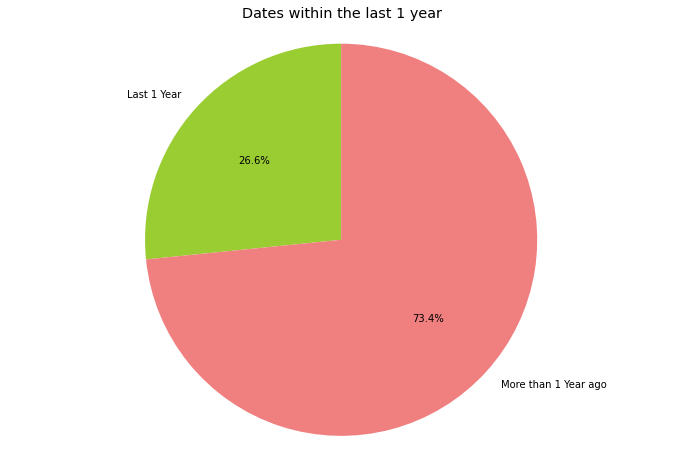

In [17]:
# create a pie chart to visualize the data
labels = ['Last 1 Year', 'More than 1 Year ago']
sizes = [len(recent_dates), len(old_dates)]
colors = ['yellowgreen', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Dates within the last 1 year')
plt.show()

### Creating a Tansaction Table having Transations history  of each customer record.

In [18]:
import random
import pandas as pd

# Load the CSV file into a Pandas DataFrame
df2 = pd.read_csv('ResourcesV01/TransactionTable.csv')

# Create a new DataFrame to hold the randomly generated values
new_df = pd.DataFrame(columns=['unique_id', 'month', 'year', 'TransactionAmount'])

# Generate new records for each unique ID
for unique_id in df2['customer_ID'].unique():
    # Generate 6 records for each unique_id
    for i in range(10):
        # Generate random values for each column
        month = random.choice(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        year = random.randint(2020, 2023)
        value = random.randint(100, 100000)
        # Add a new row to the new DataFrame with the randomly generated values
        new_df = new_df.append({'unique_id': unique_id, 'month': month, 'year': year, 'TransactionAmount': value}, ignore_index=True)
# Save the new DataFrame to a new CSV file
# new_df.to_csv('ResourcesV01/UpdatedTransactionTable', index=False)


In [19]:
new_df

unique_id month  year TransactionAmount
0     01GZ1HY1MDYF1DF31PYTRFGAM7   Nov  2022             82123
1     01GZ1HY1MDYF1DF31PYTRFGAM7   Mar  2020             68013
2     01GZ1HY1MDYF1DF31PYTRFGAM7   Jul  2023             67340
3     01GZ1HY1MDYF1DF31PYTRFGAM7   Nov  2022             58324
4     01GZ1HY1MDYF1DF31PYTRFGAM7   Apr  2020              4351
...                          ...   ...   ...               ...
9995  01GZ1HY1X4E0SNHACYD2R29NSX   Sep  2021              3689
9996  01GZ1HY1X4E0SNHACYD2R29NSX   Jun  2023             44364
9997  01GZ1HY1X4E0SNHACYD2R29NSX   Dec  2021             77822
9998  01GZ1HY1X4E0SNHACYD2R29NSX   Sep  2022             99344
9999  01GZ1HY1X4E0SNHACYD2R29NSX   Aug  2023             51631

[10000 rows x 4 columns]

In [20]:
df = pd.read_csv('ResourcesV01/CustomerDataV04.csv')
df

customer_ID prefix first_name last_name  \
0    01GZ1HY1MDYF1DF31PYTRFGAM7    Dr.      Ebony   Treneer   
1    01GZ1HY1MV8PBTH9D67Q7MZDB6    Mr.     Ashley     Naper   
2    01GZ1HY1MYD1ZF54KTWVHMFFCY    NaN     Josias       NaN   
3    01GZ1HY1N5Z506EPJGKE1ACJ1H    NaN        NaN       NaN   
4    01GZ1HY1N8BED1013ZEPWH71NS    NaN        NaN       NaN   
..                          ...    ...        ...       ...   
995  01GZ1HY1WPWBA18GXP0429BF0Q  Prof.        NaN       NaN   
996  01GZ1HY1WSE22J7H29QXM0KEV8  Prof.    Alfonso       NaN   
997  01GZ1HY1WW6N4TT543Y0GVCGTG    Mr.      Bonni    Scurry   
998  01GZ1HY1X19AAFE4SAB1WKNKYY  Prof.    Elfreda      Bent   
999  01GZ1HY1X4E0SNHACYD2R29NSX    Mr.    Ellissa    Magson   

    generationalSuffix suffixTitle                     CompleteName  \
0                   II         EdD         Dr. Ebony Treneer II,EdD   
1                  NaN         MFA            Mr. Ashley Naper ,MFA   
2                   IV         PhD           Dr. Josias Ohms IV,PhD   
3                  NaN         MFA        Prof. Garnette Copyn ,MFA   
4                   II         DPT       Mr. Curry Wetherald II,DPT   
..                 ...         ...                              ...   
995                NaN      PharmD  Prof. Carmelina Muckeen ,PharmD   
996                NaN          MA         Prof. Alfonso Odhams ,MA   
997                 II        IQCP         Mr. Bonni Scurry II,IQCP   
998                NaN         NaN             Prof. Elfreda Bent ,   
999                NaN         EdD          Mr. Ellissa Magson ,EdD   

                 gender                      email   Address1  ...  \
0             Androgyne                        NaN   Apt 1420  ...   
1    Transsexual Person                        NaN        NaN  ...   
2             Cis Woman      josias.ohms@pilog.com    Apt 423  ...   
3           Genderqueer   garnette.copyn@pilog.com   Suite 39  ...   
4          Trans Female  curry.wetherald@pilog.com   Suite 85  ...   
..                  ...                        ...        ...  ...   
995      Male to Female                        NaN   Room 141  ...   
996                 Cis                        NaN   Suite 74  ...   
997           Trans Man     bonni.scurry@pilog.com   Suite 38  ...   
998           Androgyne                        NaN    Apt 947  ...   
999            Neutrois   ellissa.magson@pilog.com  Room 1157  ...   

                 Transaction_ID Last_Transaction customer_Since  \
0    01GZ1HY1MSNCARAEESBGGZPVA0          6/24/21        2/11/02   
1    01GZ1HY1MX4APCMBGAVDB6TY8K          9/23/22         3/5/12   
2    01GZ1HY1N4W70FD3J835S4TJQA         10/17/20        3/21/95   
3    01GZ1HY1N7V826HFFYB5AJ44G4          1/11/23         1/7/92   
4    01GZ1HY1NB6KHM4C7Q12GCANTK           3/5/22        5/30/09   
..                          ...              ...            ...   
995  01GZ1HY1WRQA0TVGC01F7NAK7C          4/24/22        5/18/98   
996  01GZ1HY1WV7JPJ5MFEV8PA0G2J          7/19/22         8/7/88   
997  01GZ1HY1X03FWFD5VB10YDPH29          3/20/22         4/6/15   
998  01GZ1HY1X3K3977TFEW23TFK7V         11/28/22         4/2/97   
999  01GZ1HY1X67QFR477620K9CDR2          2/12/20        4/27/06   

                           IntBankAccNo  CreditcardNo      CreditCard_type  \
0           GB70 IDWQ 3595 8675 9760 62  4.040000e+15                 visa   
1              EE32 8732 5283 4033 8368  3.550000e+15                  jcb   
2          AE23 3075 9822 1306 9979 392  3.550000e+15                  jcb   
3         ES53 6006 0384 5093 8069 9794  2.020000e+14  diners-club-enroute   
4           GE89 PB68 3087 7536 0607 19  3.540000e+15                  jcb   
..                                  ...           ...                  ...   
995                 BE07 3844 4595 4602  4.030000e+15        visa-electron   
996            KZ61 839I XN38 8KTA ZEPM  3.540000e+15                  jcb   
997  AL46 8250 3092 JFRK I3BL BQVR OMRP  3.540000e+15         

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_ID              1000 non-null   object 
 1   prefix                   288 non-null    object 
 2   first_name               241 non-null    object 
 3   last_name                202 non-null    object 
 4   generationalSuffix       302 non-null    object 
 5   suffixTitle              226 non-null    object 
 6   CompleteName             883 non-null    object 
 7   gender                   883 non-null    object 
 8   email                    212 non-null    object 
 9   Address1                 806 non-null    object 
 10  Address2                 806 non-null    object 
 11  city                     212 non-null    object 
 12  state                    228 non-null    object 
 13  zipcode                  883 non-null    float64
 14  country                  

In [22]:
new_df['newMeanDf']= new_df.groupby(['unique_id'])['TransactionAmount'].transform('mean')
new_df['Largest_Bill_Amount']= new_df.groupby(['unique_id'])['TransactionAmount'].transform('max')
for index, row in df.iterrows():
    new_df1 = new_df[new_df['unique_id'] == row['customer_ID']]
    new_df2 = pd.DataFrame(new_df1, columns=['unique_id', 'newMeanDf','Largest_Bill_Amount']).drop_duplicates()
    if pd.isnull(row['Mean_Transaction_Amount']):
        df.at[index, 'Mean_Transaction_Amount'] = new_df2['newMeanDf']
    if pd.isnull(row['Largest_Bill_Amount']):
        df.at[index, 'Largest_Bill_Amount'] = new_df2['Largest_Bill_Amount']
df

customer_ID prefix first_name last_name  \
0    01GZ1HY1MDYF1DF31PYTRFGAM7    Dr.      Ebony   Treneer   
1    01GZ1HY1MV8PBTH9D67Q7MZDB6    Mr.     Ashley     Naper   
2    01GZ1HY1MYD1ZF54KTWVHMFFCY    NaN     Josias       NaN   
3    01GZ1HY1N5Z506EPJGKE1ACJ1H    NaN        NaN       NaN   
4    01GZ1HY1N8BED1013ZEPWH71NS    NaN        NaN       NaN   
..                          ...    ...        ...       ...   
995  01GZ1HY1WPWBA18GXP0429BF0Q  Prof.        NaN       NaN   
996  01GZ1HY1WSE22J7H29QXM0KEV8  Prof.    Alfonso       NaN   
997  01GZ1HY1WW6N4TT543Y0GVCGTG    Mr.      Bonni    Scurry   
998  01GZ1HY1X19AAFE4SAB1WKNKYY  Prof.    Elfreda      Bent   
999  01GZ1HY1X4E0SNHACYD2R29NSX    Mr.    Ellissa    Magson   

    generationalSuffix suffixTitle                     CompleteName  \
0                   II         EdD         Dr. Ebony Treneer II,EdD   
1                  NaN         MFA            Mr. Ashley Naper ,MFA   
2                   IV         PhD           Dr. Josias Ohms IV,PhD   
3                  NaN         MFA        Prof. Garnette Copyn ,MFA   
4                   II         DPT       Mr. Curry Wetherald II,DPT   
..                 ...         ...                              ...   
995                NaN      PharmD  Prof. Carmelina Muckeen ,PharmD   
996                NaN          MA         Prof. Alfonso Odhams ,MA   
997                 II        IQCP         Mr. Bonni Scurry II,IQCP   
998                NaN         NaN             Prof. Elfreda Bent ,   
999                NaN         EdD          Mr. Ellissa Magson ,EdD   

                 gender                      email   Address1  ...  \
0             Androgyne                        NaN   Apt 1420  ...   
1    Transsexual Person                        NaN        NaN  ...   
2             Cis Woman      josias.ohms@pilog.com    Apt 423  ...   
3           Genderqueer   garnette.copyn@pilog.com   Suite 39  ...   
4          Trans Female  curry.wetherald@pilog.com   Suite 85  ...   
..                  ...                        ...        ...  ...   
995      Male to Female                        NaN   Room 141  ...   
996                 Cis                        NaN   Suite 74  ...   
997           Trans Man     bonni.scurry@pilog.com   Suite 38  ...   
998           Androgyne                        NaN    Apt 947  ...   
999            Neutrois   ellissa.magson@pilog.com  Room 1157  ...   

                 Transaction_ID Last_Transaction customer_Since  \
0    01GZ1HY1MSNCARAEESBGGZPVA0          6/24/21        2/11/02   
1    01GZ1HY1MX4APCMBGAVDB6TY8K          9/23/22         3/5/12   
2    01GZ1HY1N4W70FD3J835S4TJQA         10/17/20        3/21/95   
3    01GZ1HY1N7V826HFFYB5AJ44G4          1/11/23         1/7/92   
4    01GZ1HY1NB6KHM4C7Q12GCANTK           3/5/22        5/30/09   
..                          ...              ...            ...   
995  01GZ1HY1WRQA0TVGC01F7NAK7C          4/24/22        5/18/98   
996  01GZ1HY1WV7JPJ5MFEV8PA0G2J          7/19/22         8/7/88   
997  01GZ1HY1X03FWFD5VB10YDPH29          3/20/22         4/6/15   
998  01GZ1HY1X3K3977TFEW23TFK7V         11/28/22         4/2/97   
999  01GZ1HY1X67QFR477620K9CDR2          2/12/20        4/27/06   

                           IntBankAccNo  CreditcardNo      CreditCard_type  \
0           GB70 IDWQ 3595 8675 9760 62  4.040000e+15                 visa   
1              EE32 8732 5283 4033 8368  3.550000e+15                  jcb   
2          AE23 3075 9822 1306 9979 392  3.550000e+15                  jcb   
3         ES53 6006 0384 5093 8069 9794  2.020000e+14  diners-club-enroute   
4           GE89 PB68 3087 7536 0607 19  3.540000e+15                  jcb   
..                                  ...           ...                  ...   
995                 BE07 3844 4595 4602  4.030000e+15        visa-electron   
996            KZ61 839I XN38 8KTA ZEPM  3.540000e+15                  jcb   
997  AL46 8250 3092 JFRK I3BL BQVR OMRP  3.540000e+15         

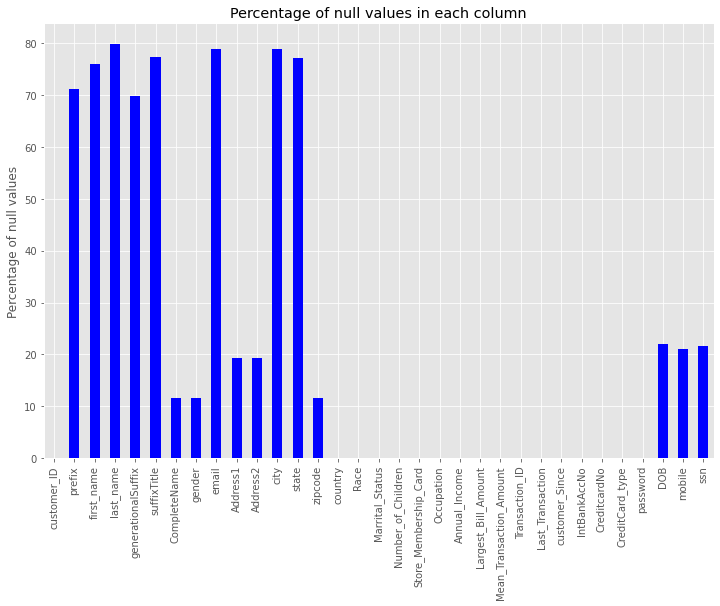

In [23]:
null_percentage = df.isnull().mean() * 100
null_percentage.plot(kind='bar', color='blue')
plt.title('Percentage of null values in each column')
plt.ylabel('Percentage of null values')
plt.show()


### Retriving the missing columns of State and City using the Zipcode API and Storing in their respective columns

In [24]:
import pandas as pd
import requests          # to perform get, post, update from any http website
import json              # convert json to python datatypes

# Use an API that can retrieve state information based on a given zipcode
ENDPOINT = "http://api.zippopotam.us/us/"
# Iterate through each record in the DataFrame
for index, row in df.iterrows():
    # Check if the state column is null for the current record
    if pd.isnull(row['state']) or pd.isnull(row['city']):
        # Extract the value of the respective zipcode column for that record
        if pd.isna(row['zipcode']) == False:
            # print(row['zipcode'])
            zipcode = str(int(row['zipcode']))     # df.astype(int)
            # print(zipcode)
            response = requests.get(ENDPOINT + zipcode)
            # print(response.text)
            if response.text !="{}":
                # Extract the state information from the API response
                state = response.json()['places'][0]['state']
                city = response.json()['places'][0]['place name']
                # Update the state column of the current record with the obtained value
                df.at[index, 'state'] = state
                df.at[index, 'city'] = city
# Save the updated DataFrame to a new CSV file
# df.to_csv('ResourcesV01/updated_dataset.csv', index=False)

In [25]:
df

customer_ID prefix first_name last_name  \
0    01GZ1HY1MDYF1DF31PYTRFGAM7    Dr.      Ebony   Treneer   
1    01GZ1HY1MV8PBTH9D67Q7MZDB6    Mr.     Ashley     Naper   
2    01GZ1HY1MYD1ZF54KTWVHMFFCY    NaN     Josias       NaN   
3    01GZ1HY1N5Z506EPJGKE1ACJ1H    NaN        NaN       NaN   
4    01GZ1HY1N8BED1013ZEPWH71NS    NaN        NaN       NaN   
..                          ...    ...        ...       ...   
995  01GZ1HY1WPWBA18GXP0429BF0Q  Prof.        NaN       NaN   
996  01GZ1HY1WSE22J7H29QXM0KEV8  Prof.    Alfonso       NaN   
997  01GZ1HY1WW6N4TT543Y0GVCGTG    Mr.      Bonni    Scurry   
998  01GZ1HY1X19AAFE4SAB1WKNKYY  Prof.    Elfreda      Bent   
999  01GZ1HY1X4E0SNHACYD2R29NSX    Mr.    Ellissa    Magson   

    generationalSuffix suffixTitle                     CompleteName  \
0                   II         EdD         Dr. Ebony Treneer II,EdD   
1                  NaN         MFA            Mr. Ashley Naper ,MFA   
2                   IV         PhD           Dr. Josias Ohms IV,PhD   
3                  NaN         MFA        Prof. Garnette Copyn ,MFA   
4                   II         DPT       Mr. Curry Wetherald II,DPT   
..                 ...         ...                              ...   
995                NaN      PharmD  Prof. Carmelina Muckeen ,PharmD   
996                NaN          MA         Prof. Alfonso Odhams ,MA   
997                 II        IQCP         Mr. Bonni Scurry II,IQCP   
998                NaN         NaN             Prof. Elfreda Bent ,   
999                NaN         EdD          Mr. Ellissa Magson ,EdD   

                 gender                      email   Address1  ...  \
0             Androgyne                        NaN   Apt 1420  ...   
1    Transsexual Person                        NaN        NaN  ...   
2             Cis Woman      josias.ohms@pilog.com    Apt 423  ...   
3           Genderqueer   garnette.copyn@pilog.com   Suite 39  ...   
4          Trans Female  curry.wetherald@pilog.com   Suite 85  ...   
..                  ...                        ...        ...  ...   
995      Male to Female                        NaN   Room 141  ...   
996                 Cis                        NaN   Suite 74  ...   
997           Trans Man     bonni.scurry@pilog.com   Suite 38  ...   
998           Androgyne                        NaN    Apt 947  ...   
999            Neutrois   ellissa.magson@pilog.com  Room 1157  ...   

                 Transaction_ID Last_Transaction customer_Since  \
0    01GZ1HY1MSNCARAEESBGGZPVA0          6/24/21        2/11/02   
1    01GZ1HY1MX4APCMBGAVDB6TY8K          9/23/22         3/5/12   
2    01GZ1HY1N4W70FD3J835S4TJQA         10/17/20        3/21/95   
3    01GZ1HY1N7V826HFFYB5AJ44G4          1/11/23         1/7/92   
4    01GZ1HY1NB6KHM4C7Q12GCANTK           3/5/22        5/30/09   
..                          ...              ...            ...   
995  01GZ1HY1WRQA0TVGC01F7NAK7C          4/24/22        5/18/98   
996  01GZ1HY1WV7JPJ5MFEV8PA0G2J          7/19/22         8/7/88   
997  01GZ1HY1X03FWFD5VB10YDPH29          3/20/22         4/6/15   
998  01GZ1HY1X3K3977TFEW23TFK7V         11/28/22         4/2/97   
999  01GZ1HY1X67QFR477620K9CDR2          2/12/20        4/27/06   

                           IntBankAccNo  CreditcardNo      CreditCard_type  \
0           GB70 IDWQ 3595 8675 9760 62  4.040000e+15                 visa   
1              EE32 8732 5283 4033 8368  3.550000e+15                  jcb   
2          AE23 3075 9822 1306 9979 392  3.550000e+15                  jcb   
3         ES53 6006 0384 5093 8069 9794  2.020000e+14  diners-club-enroute   
4           GE89 PB68 3087 7536 0607 19  3.540000e+15                  jcb   
..                                  ...           ...                  ...   
995                 BE07 3844 4595 4602  4.030000e+15        visa-electron   
996            KZ61 839I XN38 8KTA ZEPM  3.540000e+15                  jcb   
997  AL46 8250 3092 JFRK I3BL BQVR OMRP  3.540000e+15         

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_ID              1000 non-null   object 
 1   prefix                   288 non-null    object 
 2   first_name               241 non-null    object 
 3   last_name                202 non-null    object 
 4   generationalSuffix       302 non-null    object 
 5   suffixTitle              226 non-null    object 
 6   CompleteName             883 non-null    object 
 7   gender                   883 non-null    object 
 8   email                    212 non-null    object 
 9   Address1                 806 non-null    object 
 10  Address2                 806 non-null    object 
 11  city                     870 non-null    object 
 12  state                    876 non-null    object 
 13  zipcode                  883 non-null    float64
 14  country                  

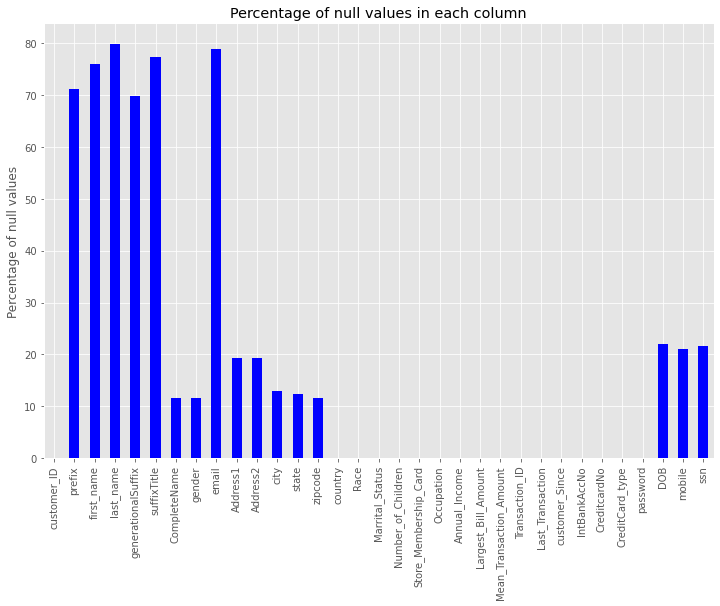

In [27]:
# calculate percentage of null values in each column
null_percentage = df.isnull().mean() * 100
null_percentage.plot(kind='bar', color='blue')
plt.title('Percentage of null values in each column')
plt.ylabel('Percentage of null values')
plt.show()


### Extracting and Parsing the CompleteName column and assign to their respective columns

In [28]:
# example data
# Mr. Melicent Rentoll ,MPHIL
# iterate through each row
for i in range(len(df['CompleteName'])):
    # print((df['CompleteName'][i]))
    # split the full name
    if pd.isna(df['CompleteName'][i]) == False:
        parts = df['CompleteName'][i].split(',')
        parts1=parts[0].split()
        # assign the parts to their respective columns
        if pd.isnull(df['suffixTitle'][i]):
            df['suffixTitle'][i] = parts[1]
        # print(len(parts1))
        if pd.isnull(df['prefix'][i]):
            df['prefix'][i] = parts1[0]
        if pd.isnull(df['first_name'][i]):
            df['first_name'][i] = parts1[1]
        if pd.isnull(df['last_name'][i]):
            df['last_name'][i] = parts1[2]
        if len(parts1) > 3:
            df['generationalSuffix'][i] = parts1[3]
        if pd.isnull(df['email'][i]):
            df['email'][i] = df['first_name'][i] + "." + df['last_name'][i] + "@pilog.com"
# # print the updated data
# print(df5)
# Save the updated DataFrame to a new CSV file
# df.to_csv('ResourcesV01/parsedNameData.csv', index=False)

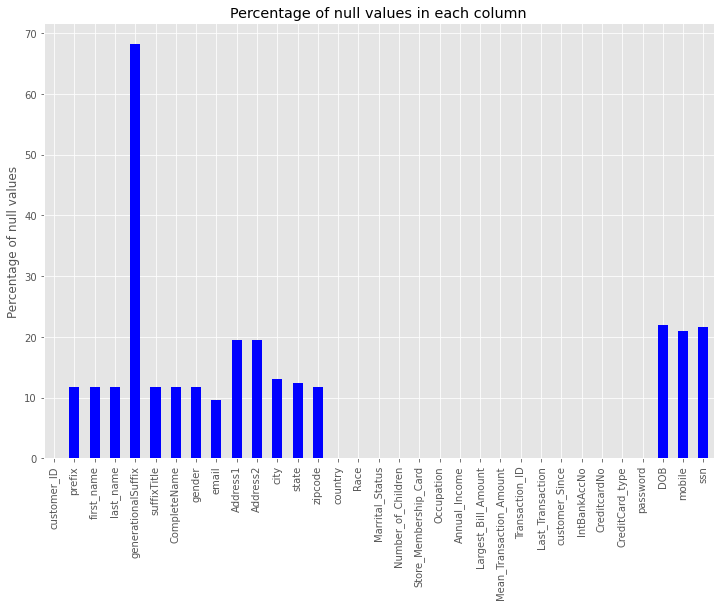

In [29]:
null_percentage = df.isnull().mean() * 100
null_percentage.plot(kind='bar', color='blue')
plt.title('Percentage of null values in each column')
plt.ylabel('Percentage of null values')
plt.show()

In [30]:
from dateutil import parser
df = pd.read_csv('ResourcesV01/CustomerDataV04.csv')
for index, row in df.iterrows():
    if pd.isna(row['DOB']) == True:
        continue;
    DOB = parser.parse(str(row["DOB"]),fuzzy=True).date()
    d = parser.parse(str(DOB))
    print(d.strftime("%m/%d/%Y"))
    df.at[index, 'DOB'] = DOB
df.to_csv('ResourcesV01/CustomerDataV05.csv', index=False)

05/31/2006
07/17/1966
07/29/2000
08/21/1966
04/07/2015
05/04/1979
04/22/2013
06/16/2006
05/21/2018
04/10/1963
08/28/1988
01/14/1985
06/03/2000
08/27/2011
01/20/2003
03/01/1966
12/05/1984
01/09/2021
10/06/2015
09/22/2022
06/20/1994
07/15/1994
09/28/1969
09/29/2025
10/05/1979
09/10/1986
12/26/1977
03/15/2018
01/04/1994
07/25/1988
06/10/1977
07/22/1981
03/08/1989
12/17/1994
12/19/2024
05/02/1990
03/10/2000
08/04/1983
12/16/2010
11/10/1993
09/13/1969
06/19/1996
06/29/2015
05/19/1999
10/06/1993
09/15/1994
12/07/2000
05/29/1978
05/16/1981
02/18/2021
03/14/2005
12/04/2024
08/15/1973
06/12/1968
03/15/1997
11/01/2014
12/31/1976
11/27/1973
03/18/2017
05/09/1989
05/24/1977
12/20/2027
04/13/2024
09/17/1984
09/17/2070
11/21/1967
06/24/1982
11/15/2065
04/27/1986
02/29/2020
05/04/1968
10/30/2063
06/23/2022
07/16/1978
07/20/2019
10/02/1964
03/18/1976
12/18/1975
10/03/2016
04/01/1969
03/02/1976
02/01/2002
01/03/1968
08/18/1993
02/04/1999
11/18/2012
02/19/2007
03/19/2001
10/22/2021
09/03/2013
01/11/2011

In [31]:
df

customer_ID prefix first_name last_name  \
0    01GZ1HY1MDYF1DF31PYTRFGAM7    Dr.      Ebony   Treneer   
1    01GZ1HY1MV8PBTH9D67Q7MZDB6    Mr.     Ashley     Naper   
2    01GZ1HY1MYD1ZF54KTWVHMFFCY    NaN     Josias       NaN   
3    01GZ1HY1N5Z506EPJGKE1ACJ1H    NaN        NaN       NaN   
4    01GZ1HY1N8BED1013ZEPWH71NS    NaN        NaN       NaN   
..                          ...    ...        ...       ...   
995  01GZ1HY1WPWBA18GXP0429BF0Q  Prof.        NaN       NaN   
996  01GZ1HY1WSE22J7H29QXM0KEV8  Prof.    Alfonso       NaN   
997  01GZ1HY1WW6N4TT543Y0GVCGTG    Mr.      Bonni    Scurry   
998  01GZ1HY1X19AAFE4SAB1WKNKYY  Prof.    Elfreda      Bent   
999  01GZ1HY1X4E0SNHACYD2R29NSX    Mr.    Ellissa    Magson   

    generationalSuffix suffixTitle                     CompleteName  \
0                   II         EdD         Dr. Ebony Treneer II,EdD   
1                  NaN         MFA            Mr. Ashley Naper ,MFA   
2                   IV         PhD           Dr. Josias Ohms IV,PhD   
3                  NaN         MFA        Prof. Garnette Copyn ,MFA   
4                   II         DPT       Mr. Curry Wetherald II,DPT   
..                 ...         ...                              ...   
995                NaN      PharmD  Prof. Carmelina Muckeen ,PharmD   
996                NaN          MA         Prof. Alfonso Odhams ,MA   
997                 II        IQCP         Mr. Bonni Scurry II,IQCP   
998                NaN         NaN             Prof. Elfreda Bent ,   
999                NaN         EdD          Mr. Ellissa Magson ,EdD   

                 gender                      email   Address1  ...  \
0             Androgyne                        NaN   Apt 1420  ...   
1    Transsexual Person                        NaN        NaN  ...   
2             Cis Woman      josias.ohms@pilog.com    Apt 423  ...   
3           Genderqueer   garnette.copyn@pilog.com   Suite 39  ...   
4          Trans Female  curry.wetherald@pilog.com   Suite 85  ...   
..                  ...                        ...        ...  ...   
995      Male to Female                        NaN   Room 141  ...   
996                 Cis                        NaN   Suite 74  ...   
997           Trans Man     bonni.scurry@pilog.com   Suite 38  ...   
998           Androgyne                        NaN    Apt 947  ...   
999            Neutrois   ellissa.magson@pilog.com  Room 1157  ...   

                 Transaction_ID Last_Transaction customer_Since  \
0    01GZ1HY1MSNCARAEESBGGZPVA0          6/24/21        2/11/02   
1    01GZ1HY1MX4APCMBGAVDB6TY8K          9/23/22         3/5/12   
2    01GZ1HY1N4W70FD3J835S4TJQA         10/17/20        3/21/95   
3    01GZ1HY1N7V826HFFYB5AJ44G4          1/11/23         1/7/92   
4    01GZ1HY1NB6KHM4C7Q12GCANTK           3/5/22        5/30/09   
..                          ...              ...            ...   
995  01GZ1HY1WRQA0TVGC01F7NAK7C          4/24/22        5/18/98   
996  01GZ1HY1WV7JPJ5MFEV8PA0G2J          7/19/22         8/7/88   
997  01GZ1HY1X03FWFD5VB10YDPH29          3/20/22         4/6/15   
998  01GZ1HY1X3K3977TFEW23TFK7V         11/28/22         4/2/97   
999  01GZ1HY1X67QFR477620K9CDR2          2/12/20        4/27/06   

                           IntBankAccNo  CreditcardNo      CreditCard_type  \
0           GB70 IDWQ 3595 8675 9760 62  4.040000e+15                 visa   
1              EE32 8732 5283 4033 8368  3.550000e+15                  jcb   
2          AE23 3075 9822 1306 9979 392  3.550000e+15                  jcb   
3         ES53 6006 0384 5093 8069 9794  2.020000e+14  diners-club-enroute   
4           GE89 PB68 3087 7536 0607 19  3.540000e+15                  jcb   
..                                  ...           ...                  ...   
995                 BE07 3844 4595 4602  4.030000e+15        visa-electron   
996            KZ61 839I XN38 8KTA ZEPM  3.540000e+15                  jcb   
997  AL46 8250 3092 JFRK I3BL BQVR OMRP  3.540000e+15         

In [32]:
df

customer_ID prefix first_name last_name  \
0    01GZ1HY1MDYF1DF31PYTRFGAM7    Dr.      Ebony   Treneer   
1    01GZ1HY1MV8PBTH9D67Q7MZDB6    Mr.     Ashley     Naper   
2    01GZ1HY1MYD1ZF54KTWVHMFFCY    NaN     Josias       NaN   
3    01GZ1HY1N5Z506EPJGKE1ACJ1H    NaN        NaN       NaN   
4    01GZ1HY1N8BED1013ZEPWH71NS    NaN        NaN       NaN   
..                          ...    ...        ...       ...   
995  01GZ1HY1WPWBA18GXP0429BF0Q  Prof.        NaN       NaN   
996  01GZ1HY1WSE22J7H29QXM0KEV8  Prof.    Alfonso       NaN   
997  01GZ1HY1WW6N4TT543Y0GVCGTG    Mr.      Bonni    Scurry   
998  01GZ1HY1X19AAFE4SAB1WKNKYY  Prof.    Elfreda      Bent   
999  01GZ1HY1X4E0SNHACYD2R29NSX    Mr.    Ellissa    Magson   

    generationalSuffix suffixTitle                     CompleteName  \
0                   II         EdD         Dr. Ebony Treneer II,EdD   
1                  NaN         MFA            Mr. Ashley Naper ,MFA   
2                   IV         PhD           Dr. Josias Ohms IV,PhD   
3                  NaN         MFA        Prof. Garnette Copyn ,MFA   
4                   II         DPT       Mr. Curry Wetherald II,DPT   
..                 ...         ...                              ...   
995                NaN      PharmD  Prof. Carmelina Muckeen ,PharmD   
996                NaN          MA         Prof. Alfonso Odhams ,MA   
997                 II        IQCP         Mr. Bonni Scurry II,IQCP   
998                NaN         NaN             Prof. Elfreda Bent ,   
999                NaN         EdD          Mr. Ellissa Magson ,EdD   

                 gender                      email   Address1  ...  \
0             Androgyne                        NaN   Apt 1420  ...   
1    Transsexual Person                        NaN        NaN  ...   
2             Cis Woman      josias.ohms@pilog.com    Apt 423  ...   
3           Genderqueer   garnette.copyn@pilog.com   Suite 39  ...   
4          Trans Female  curry.wetherald@pilog.com   Suite 85  ...   
..                  ...                        ...        ...  ...   
995      Male to Female                        NaN   Room 141  ...   
996                 Cis                        NaN   Suite 74  ...   
997           Trans Man     bonni.scurry@pilog.com   Suite 38  ...   
998           Androgyne                        NaN    Apt 947  ...   
999            Neutrois   ellissa.magson@pilog.com  Room 1157  ...   

                 Transaction_ID Last_Transaction customer_Since  \
0    01GZ1HY1MSNCARAEESBGGZPVA0          6/24/21        2/11/02   
1    01GZ1HY1MX4APCMBGAVDB6TY8K          9/23/22         3/5/12   
2    01GZ1HY1N4W70FD3J835S4TJQA         10/17/20        3/21/95   
3    01GZ1HY1N7V826HFFYB5AJ44G4          1/11/23         1/7/92   
4    01GZ1HY1NB6KHM4C7Q12GCANTK           3/5/22        5/30/09   
..                          ...              ...            ...   
995  01GZ1HY1WRQA0TVGC01F7NAK7C          4/24/22        5/18/98   
996  01GZ1HY1WV7JPJ5MFEV8PA0G2J          7/19/22         8/7/88   
997  01GZ1HY1X03FWFD5VB10YDPH29          3/20/22         4/6/15   
998  01GZ1HY1X3K3977TFEW23TFK7V         11/28/22         4/2/97   
999  01GZ1HY1X67QFR477620K9CDR2          2/12/20        4/27/06   

                           IntBankAccNo  CreditcardNo      CreditCard_type  \
0           GB70 IDWQ 3595 8675 9760 62  4.040000e+15                 visa   
1              EE32 8732 5283 4033 8368  3.550000e+15                  jcb   
2          AE23 3075 9822 1306 9979 392  3.550000e+15                  jcb   
3         ES53 6006 0384 5093 8069 9794  2.020000e+14  diners-club-enroute   
4           GE89 PB68 3087 7536 0607 19  3.540000e+15                  jcb   
..                                  ...           ...                  ...   
995                 BE07 3844 4595 4602  4.030000e+15        visa-electron   
996            KZ61 839I XN38 8KTA ZEPM  3.540000e+15                  jcb   
997  AL46 8250 3092 JFRK I3BL BQVR OMRP  3.540000e+15         

In [33]:
df = pd.read_csv('ResourcesV01/CustomerDataV04.csv')
df

customer_ID prefix first_name last_name  \
0    01GZ1HY1MDYF1DF31PYTRFGAM7    Dr.      Ebony   Treneer   
1    01GZ1HY1MV8PBTH9D67Q7MZDB6    Mr.     Ashley     Naper   
2    01GZ1HY1MYD1ZF54KTWVHMFFCY    NaN     Josias       NaN   
3    01GZ1HY1N5Z506EPJGKE1ACJ1H    NaN        NaN       NaN   
4    01GZ1HY1N8BED1013ZEPWH71NS    NaN        NaN       NaN   
..                          ...    ...        ...       ...   
995  01GZ1HY1WPWBA18GXP0429BF0Q  Prof.        NaN       NaN   
996  01GZ1HY1WSE22J7H29QXM0KEV8  Prof.    Alfonso       NaN   
997  01GZ1HY1WW6N4TT543Y0GVCGTG    Mr.      Bonni    Scurry   
998  01GZ1HY1X19AAFE4SAB1WKNKYY  Prof.    Elfreda      Bent   
999  01GZ1HY1X4E0SNHACYD2R29NSX    Mr.    Ellissa    Magson   

    generationalSuffix suffixTitle                     CompleteName  \
0                   II         EdD         Dr. Ebony Treneer II,EdD   
1                  NaN         MFA            Mr. Ashley Naper ,MFA   
2                   IV         PhD           Dr. Josias Ohms IV,PhD   
3                  NaN         MFA        Prof. Garnette Copyn ,MFA   
4                   II         DPT       Mr. Curry Wetherald II,DPT   
..                 ...         ...                              ...   
995                NaN      PharmD  Prof. Carmelina Muckeen ,PharmD   
996                NaN          MA         Prof. Alfonso Odhams ,MA   
997                 II        IQCP         Mr. Bonni Scurry II,IQCP   
998                NaN         NaN             Prof. Elfreda Bent ,   
999                NaN         EdD          Mr. Ellissa Magson ,EdD   

                 gender                      email   Address1  ...  \
0             Androgyne                        NaN   Apt 1420  ...   
1    Transsexual Person                        NaN        NaN  ...   
2             Cis Woman      josias.ohms@pilog.com    Apt 423  ...   
3           Genderqueer   garnette.copyn@pilog.com   Suite 39  ...   
4          Trans Female  curry.wetherald@pilog.com   Suite 85  ...   
..                  ...                        ...        ...  ...   
995      Male to Female                        NaN   Room 141  ...   
996                 Cis                        NaN   Suite 74  ...   
997           Trans Man     bonni.scurry@pilog.com   Suite 38  ...   
998           Androgyne                        NaN    Apt 947  ...   
999            Neutrois   ellissa.magson@pilog.com  Room 1157  ...   

                 Transaction_ID Last_Transaction customer_Since  \
0    01GZ1HY1MSNCARAEESBGGZPVA0          6/24/21        2/11/02   
1    01GZ1HY1MX4APCMBGAVDB6TY8K          9/23/22         3/5/12   
2    01GZ1HY1N4W70FD3J835S4TJQA         10/17/20        3/21/95   
3    01GZ1HY1N7V826HFFYB5AJ44G4          1/11/23         1/7/92   
4    01GZ1HY1NB6KHM4C7Q12GCANTK           3/5/22        5/30/09   
..                          ...              ...            ...   
995  01GZ1HY1WRQA0TVGC01F7NAK7C          4/24/22        5/18/98   
996  01GZ1HY1WV7JPJ5MFEV8PA0G2J          7/19/22         8/7/88   
997  01GZ1HY1X03FWFD5VB10YDPH29          3/20/22         4/6/15   
998  01GZ1HY1X3K3977TFEW23TFK7V         11/28/22         4/2/97   
999  01GZ1HY1X67QFR477620K9CDR2          2/12/20        4/27/06   

                           IntBankAccNo  CreditcardNo      CreditCard_type  \
0           GB70 IDWQ 3595 8675 9760 62  4.040000e+15                 visa   
1              EE32 8732 5283 4033 8368  3.550000e+15                  jcb   
2          AE23 3075 9822 1306 9979 392  3.550000e+15                  jcb   
3         ES53 6006 0384 5093 8069 9794  2.020000e+14  diners-club-enroute   
4           GE89 PB68 3087 7536 0607 19  3.540000e+15                  jcb   
..                                  ...           ...                  ...   
995                 BE07 3844 4595 4602  4.030000e+15        visa-electron   
996            KZ61 839I XN38 8KTA ZEPM  3.540000e+15                  jcb   
997  AL46 8250 3092 JFRK I3BL BQVR OMRP  3.540000e+15         

In [35]:
# formats = ['###-###-####', '', '(###)#######', '(###) ###-####', '', '(###)-###-####', '', '###.###.####', '1+##########', '', '1+(###) ###-####', '', '### ### ####', '##########', '', '###*###*####', '', '(###) ###.####', '###-#######', '###.#######', '', '(###) #######', '(###)###-####', '']

def standardize_mobile(number):
    # print(number)
    number = (number.replace(' ', '').replace('.', '').replace('*', '').replace('+', '').replace('(', '').replace(')', '').replace('-', ''))  # remove spaces, dots, and asterisks
    # print(number)
    if len(number) == 9:            #  (###) ###-####
        return '(' + number[:3] + ')' + ' ' + number[3:6] + '-' + number[6:]
    if len(number) == 10:            #  (###) ###-####
        return '(' + number[:3] + ')' + ' ' + number[3:6] + '-' + number[6:]
    elif len(number) == 11:
        return '(' + number[1:4] + ')' + ' ' + number[4:7] + '-' + number[7:]
        return '+' + number[0] + ' (' + number[1:4] + ') ' + number[4:7] + '-' + number[7:]
    elif len(number) == 12:      # 1+5744009961    11410551147
        return '(' + number[2:5] + ') ' + number[5:8] + '-' + number[8:]
    # elif len(number) == 13:
    #     return '(' + number[1:4] + ') ' + number[4:7] + '-' + number[7:]
    else:
        return number
#
for index, row in df.iterrows():
    if pd.isna(row['mobile']) == True:
        continue;
# Apply the function to the 'DOB' column
# df['mobile'] = df['mobile'].apply(str(convert_phone_number))
    df.at[index,'mobile'] =(str(standardize_mobile(row['mobile'])))
    print(row['mobile'])
#     # Save data
# df.to_csv('data_us_standard.csv', index=False)

(777) 522-6055
(824) 792-1758
(116) 959-2589
(144) 705-9220
(625) 163-6681
(743) 434-1890
(379) 651-9579
(667) 182-6214
(522) 641-4192
(152) 194-5199
(561) 839-3616
(340) 212-6181
(262) 239-4946
(428) 426-8083
(914) 940-8954
(084) 568-6334
(585) 639-3197
(962) 626-8624
(397) 995-0206
(193) 275-0425
(739) 722-7237
(830) 759-9924
(401) 338-9477
(108) 733-3795
(048) 924-9319
(126) 919-2976
(424) 420-6304
(316) 905-7042
(414) 439-0487
(777) 336-0618
(432) 357-8399
(041) 171-6918
(951) 149-9871
(800) 187-6898
(051) 927-6107
(343) 229-8101
(562) 687-7287
(623) 687-1465
(901) 013-3028
(828) 653-5231
(683) 036-4335
(027) 870-5025
(001) 885-5353
(095) 701-7453
(375) 663-4644
(599) 206-5610
(131) 122-8697
(837) 019-5204
(337) 204-2825
(901) 242-0382
(799) 948-5917
(995) 525-4928
(842) 202-8292
(713) 444-4235
(413) 654-3156
(238) 735-7280
(990) 773-0689
(621) 443-5257
(750) 649-3796
(266) 151-1467
(846) 759-0773
(433) 057-3216
(585) 343-7857
(761) 665-0948
(564) 604-0592
(196) 871-5014
(907) 255-

### Uniqueness:
> Record Linkage

In [36]:
# !pip install recordlinkage
import recordlinkage
import pandas as pd
df_a = pd.read_csv('ResourcesV01/CustomerDataV05-Openrefined.csv',index_col=0)
df_b = pd.read_csv('ResourcesV01/DuplicateDataset.csv',index_col=0)
df_a['DOB'] = df_a['DOB'].astype('datetime64')
df_b['DOB'] = df_b['DOB'].astype('datetime64')

### Making smart set of candidate links with built-in indexing techniques --> blocking
> Only records pairs agreeing on the surname are included.

In [37]:
indexer = recordlinkage.Index()
# indexer.block("Address1")
indexer.block("last_name")
candidate_links = indexer.index(df_a, df_b)
candidate_links
print (len(df_a), len(df_b), len(candidate_links))

1000 58 55


### Each candidate_link needs to be compared on the comparable attributes.
### Done with Compare class and the available comparison and similarity measures.

In [38]:
c = recordlinkage.Compare()

c.string('last_name', 'last_name', method='jarowinkler', threshold=0.65)
c.exact('gender', 'gender')
c.date('DOB', 'DOB')
c.string('Address2', 'Address2', method='damerau_levenshtein', threshold=0.7)
c.exact('Address1', 'Address1')
#c.numeric('Annual_Income', 'Annual_Income', method='gauss', offset=3, scale=3, missing_value=0.5)
# c.numeric('ssn', 'ssn', method='gauss', offset=3, scale=3, missing_value=0.5)
#c.numeric('mobile', 'mobile', method='gauss', offset=3, scale=3, missing_value=0.5)
# The comparison vectors
feature_vectors = c.compute(candidate_links, df_a, df_b)

In [39]:
feature_vectors

0  1  2    3  4
customer_ID                customer_ID_Duplicate                        
01GZ1HY1MDYF1DF31PYTRFGAM7 01GY0YYXCXQT03DFJWBP4R43CB  1.0  1  1  1.0  0
01GZ1HY1P37GYTAD1S1YTKRYSR 01GY0YYXDMVNXH2QT7HHR4ATD4  1.0  1  1  0.0  0
01GZ1HY1PMVJD9WBQMQXHRN2QQ 01GY0YYXDZQM64ANY2T5N652R7  1.0  1  1  1.0  0
01GZ1HY1Q1A7QR27WTWAX0PYB2 01GY0YYXE37WXYP20T328BAQ9G  1.0  1  1  0.0  0
01GZ1HY1Q7B6HGC5QXZWBGEMGE 01GY0YYXE7HCAN29YSQK6Y5ZDD  1.0  1  1  0.0  0
01GZ1HY1QZF4DGS5HRDP799KPV 01GY0YYXEGM8NGZSJC1PX28A0E  1.0  1  0  0.0  0
01GZ1HY1R5G0QB57X1W58RRJAE 01GY0YYXEMY3XQAT1EYS4HC510  1.0  1  1  1.0  1
01GZ1HY1S9KW3TEF2YNB74MY02 01GY0YYXESCQ0GZ6QJASVC2PT0  1.0  1  1  1.0  1
01GZ1HY1SRN2Y1XVWEWKCFVAEM 01GY0YYXEYNXMCWYDCD8FCTZT6  1.0  1  1  1.0  1
01GZ1HY1T8A291VEMAM0N1K92C 01GY0YYXF2Z7VY5V2KQWHPVS1P  1.0  1  1  1.0  1
01GZ1HY1TXEKFAKCQF6DBCPKB7 01GY0YYXF83S8XVNS13099Q3DS  1.0  1  0  1.0  1
01GZ1HY1K4CWVBXN9JRZ3MCYTW 01GY0YYXFDPYNDKQKKY4DWPMXG  1.0  1  0  0.0  0
01GZ1HY1KFWJE4E0P7TQCQG8GV 01GY0YYXFJ2XBDA3RDRCQ6N7E4  1.0  1  0  1.0  1
01GZ1HY1KQMZV31T5MM3WKKX68 01GY0YYXFQWDN64RZAM7XDT1FY  1.0  1  1  0.0  0
01GZ1HY1M2S6YSG308HQ1Z1HN9 01GY0YYXFW3G49RFJN4CN045WW  1.0  1  0  1.0  1
01GZ1HY1NMEZSVX1YM1SQ7P936 01GY0YYXG1PF66PZQBXZTVDM98  1.0  1  0  1.0  1
01GZ1HY1PBB65FERBC07W0PZGM 01GY0YYXG8YGGBK032JDVNQ7EZ  1.0  1  0  1.0  1
01GZ1HY1PNTR4GR2YJ4R0XKHT1 01GY0YYXGC4YEWP9TPDQGWWCQJ  1.0  1  1  0.0  1
01GZ1HY1QDS446M0SG1D97MSVQ 01GY0YYXGFT6C71AT3RMEA3MPY  1.0  1  1  0.0  1
01GZ1HY1QRWNHDP087NFBDF5EA 01GY0YYXGJAG9FPC4MP3FG43QF  1.0  1  1  1.0  1
01GZ1HY1RQQTA9W0NPTG9CQY4H 01GY0YYXGNMRYFKG7JY1C8Q5JJ  1.0  1  1  1.0  1
01GZ1HY1T2BS14TCD01SY6VXB1 01GY0YYXGQTPV3REFKYA832J1M  1.0  1  1  1.0  1
01GZ1HY1HF6PCTDJDVZKAC0DSR 01GY0YYXH1N7CBA1PQKFCTKT8C  1.0  1  0  1.0  1
01GZ1HY1J199F9N47RZ2VKEFBG 01GY0YYXH7XXK2HWBJDGNV5D0C  1.0  1  0  0.0  1
01GZ1HY1M9GRDWEN5GV9M5MV4Q 01GY0YYXHC308YZXKP5DHDHK0A  1.0  1  1  1.0  1
01GZ1HY1MR8PA0VHNXRVBDCP37 01GY0YYXJ5YMGJJ0CAWN2JZWY1  1.0  0  0  0.0  0
01GZ1HY1RN2V07ECNNG5NV5Y7H 01GY0YYXJ5YMGJJ0CAWN2JZWY1  1.0  1  0  0.0  0
01GZ1HY1N62B9MSDD2MKN2KXC0 01GY0YYXHFRN5XY2CFP017XEMB  1.0  1  0  1.0  1
01GZ1HY1PBKXYZDBJRB7ZGCMAK 01GY0YYXHHPAQRJWEJBA1ZFS8A  1.0  1  1  0.0  0
                           01GY0YYXHPX566A5QSAS03RCXY  1.0  1  1  0.0  0
01GZ1HY1H15MKCN29V6GGEVF9A 01GY0YYXK97PWE7A7XHHMBCRJG  1.0  0  0  0.0  0
01GZ1HY1E5H033515XPM7B5AAW 01GY0YYXK97PWE7A7XHHMBCRJG  1.0  1  1  1.0  1
01GZ1HY1HGG6DQEFFRE0A3JYWD 01GY0YYXHV2QMXZ8EJZ9YFPKAP  1.0  1  0  1.0  1
01GZ1HY1HWB92N46SPS64V1QCX 01GY0YYXJ0XMRC1RHWC7STYSW1  1.0  1  1  0.0  0
01GZ1HY1SA0YN54C78ZDQHRW8S 01GY0YYXJ8MFVPRXX2Q0Q8AZBY  1.0  1  0  0.0  0
01GZ1HY1SGK72NFH304WZPWZ38 01GY0YYXJBA0C61ZD6FF9ZZWTR  1.0  1  1  1.0  1
                           01GY0YYX7ZMM7PZP0KGF2AY4X0  1.0  1  1  1.0  1
01GZ1HY1Q60MPPM9VAY0YD0NGV 01GY0YYXJEV493ASGB0NWDTP99  1.0  1  0  1.0  1
01GZ1HY1QY3FZX04D9TP6K3QW6 01GY0YYXJHEV95VQ0P1X3X7G1J  1.0  1  1  1.0  1
01GZ1HY1JJ4PHXJ7C38PWGYQ9V 01GY0YYXJMX5B3WYZABV465HSA  1.0  1  0  1.0  1
01GZ1HY1KASDV652T4HBTZ6MQ6 01GY0YYXJQFH6W0J1K3F8JFKG5  1.0  1  1  1.0  1
01GZ1HY1SY1WT185SRBSCT5WGM 01GY0YYXJTDFZYTS04C7NTK6DM  1.0  1  0  0.0  1
01GZ1HY1KAMH50NF0DXH47J2HS 01GY0YYX8RE26XQDAXBR5TYENH  1.0  0  0  0.0  0
01GZ1HY1WW6N4TT543Y0GVCGTG 01GY0YYX8RE26XQDAXBR5TYENH  1.0  1  1  0.0  1
01GZ1HY1T3J8ZQT8C0XNNGSA55 01GY0YYXJXHBD3PXPACRTSJVZ4  1.0  1  1  0.0  1
01GZ1HY1TNYMT5YEHT211X52A2 01GY0YYXK0ZDP95N9QVW5KP8P3  1.0  1  1  1.0  1
01GZ1HY1GT5E28TFR13BQTSTNH 01GY0YYXK30ZD18HRMH4GCQ69G  1.0  1  1  1.0  1
01GZ1HY1DGVAPAD679Y5CY131J 01GY0YYXK6SKBYKZB8F749NTPM  1.0  1  1  0.0  1
01GZ1HY1RRQGFVAQTW94A3608R 01GY0YYXKCG4YA8D9K5WQ0F551  1.0  1  0  1.0  1
01GZ1HY1RN33Z6X70JGRNY8VD6 01GY0YYXKFMDNM86EB74AG6EQS  1.0  1  1  1.0  1
01GZ1HY1ZFQXRJFM6XGJ5YP8K9 01GY0YYX8A6NCPSH44BCTGKX2W  1.0  1  1  0.0  1
01GZ1HY20M89WGBJ0M23Q7DPJY 01GY0YYX8HYNZZNFHCE248T9XS  1.0  1  1  1.0  1
01GZ1HY20ZQ784PP8J9M45JRQ1 01GY0YYX8N070484G7ASRZ480Q  1.0  1  1  0.0  1
01GZ1HY1WERTTEXSV5176YRS3G 01GY0YYX8ZTTWTF

In [40]:
feature_vectors.sum(axis=1).value_counts().sort_index(ascending=False)

5.0    17
4.0    22
3.0     9
2.0     4
1.0     3
dtype: int64

In [41]:
# feature_vectors = feature_vectors[(feature_vectors['sum']) >=2]
# len(feature_vectors)


In [42]:
feature_vectors.dtypes

0    float64
1      int64
2      int64
3    float64
4      int64
dtype: object

###     Method =2
## Using Soundex Blocking


In [43]:
true_links = pd.read_csv("ResourcesV01/true_links1.csv",index_col=(0,1))
true_links

Empty DataFrame
Columns: []
Index: [(01GZ1HY1MDYF1DF31PYTRFGAM7, 01GY0YYXCXQT03DFJWBP4R43CB), (01GZ1HY1NT8MT6ZXJQPTJGJ25P, 01GY0YYXDE2H28GB8JKRW17F28), (01GZ1HY1P37GYTAD1S1YTKRYSR, 01GY0YYXDMVNXH2QT7HHR4ATD4), (01GZ1HY1PE3VMTK5KS03B3WE5V, 01GY0YYXDSM08225R9H64TRP9T), (01GZ1HY1PMVJD9WBQMQXHRN2QQ, 01GY0YYXDZQM64ANY2T5N652R7), (01GZ1HY1Q1A7QR27WTWAX0PYB2, 01GY0YYXE37WXYP20T328BAQ9G), (01GZ1HY1Q7B6HGC5QXZWBGEMGE, 01GY0YYXE7HCAN29YSQK6Y5ZDD), (01GZ1HY1QKQXQWRADDMH72K8PM, 01GY0YYXEAVYT0DJB27DPZ4JZY), (01GZ1HY1QSW64YQKV4XFCXZY1C, 01GY0YYXEDW826EH7QRVRSTFGT), (01GZ1HY1QZF4DGS5HRDP799KPV, 01GY0YYXEGM8NGZSJC1PX28A0E), (01GZ1HY1R5G0QB57X1W58RRJAE, 01GY0YYXEMY3XQAT1EYS4HC510), (01GZ1HY1S9KW3TEF2YNB74MY02, 01GY0YYXESCQ0GZ6QJASVC2PT0), (01GZ1HY1SRN2Y1XVWEWKCFVAEM, 01GY0YYXEYNXMCWYDCD8FCTZT6), (01GZ1HY1T8A291VEMAM0N1K92C, 01GY0YYXF2Z7VY5V2KQWHPVS1P), (01GZ1HY1TXEKFAKCQF6DBCPKB7, 01GY0YYXF83S8XVNS13099Q3DS), (01GZ1HY1K4CWVBXN9JRZ3MCYTW, 01GY0YYXFDPYNDKQKKY4DWPMXG), (01GZ1HY1KFWJE4E0P7TQCQG8GV, 01GY0YYXFJ2XBDA3RDRCQ6N7E4), (01GZ1HY1KQMZV31T5MM3WKKX68, 01GY0YYXFQWDN64RZAM7XDT1FY), (01GZ1HY1M2S6YSG308HQ1Z1HN9, 01GY0YYXFW3G49RFJN4CN045WW), (01GZ1HY1NMEZSVX1YM1SQ7P936, 01GY0YYXG1PF66PZQBXZTVDM98), (01GZ1HY1PBB65FERBC07W0PZGM, 01GY0YYXG8YGGBK032JDVNQ7EZ), (01GZ1HY1PNTR4GR2YJ4R0XKHT1, 01GY0YYXGC4YEWP9TPDQGWWCQJ), (01GZ1HY1QDS446M0SG1D97MSVQ, 01GY0YYXGFT6C71AT3RMEA3MPY), (01GZ1HY1QRWNHDP087NFBDF5EA, 01GY0YYXGJAG9FPC4MP3FG43QF), (01GZ1HY1RQQTA9W0NPTG9CQY4H, 01GY0YYXGNMRYFKG7JY1C8Q5JJ), (01GZ1HY1T2BS14TCD01SY6VXB1, 01GY0YYXGQTPV3REFKYA832J1M), (01GZ1HY1G5ZZGP460QG7SFWNJF, 01GY0YYXGW9VY89FK6C8W7E1ND), (01GZ1HY1HF6PCTDJDVZKAC0DSR, 01GY0YYXH1N7CBA1PQKFCTKT8C), (01GZ1HY1J199F9N47RZ2VKEFBG, 01GY0YYXH7XXK2HWBJDGNV5D0C), (01GZ1HY1M9GRDWEN5GV9M5MV4Q, 01GY0YYXHC308YZXKP5DHDHK0A), (01GZ1HY1N62B9MSDD2MKN2KXC0, 01GY0YYXHFRN5XY2CFP017XEMB), (01GZ1HY1PBKXYZDBJRB7ZGCMAK, 01GY0YYXHHPAQRJWEJBA1ZFS8A), (01GZ1HY1PBKXYZDBJRB7ZGCMAK, 01GY0YYXHPX566A5QSAS03RCXY), (01GZ1HY1HGG6DQEFFRE0A3JYWD, 01GY0YYXHV2QMXZ8EJZ9YFPKAP), (01GZ1HY1HWB92N46SPS64V1QCX, 01GY0YYXJ0XMRC1RHWC7STYSW1), (01GZ1HY1RN2V07ECNNG5NV5Y7H, 01GY0YYXJ5YMGJJ0CAWN2JZWY1), (01GZ1HY1SA0YN54C78ZDQHRW8S, 01GY0YYXJ8MFVPRXX2Q0Q8AZBY), (01GZ1HY1SGK72NFH304WZPWZ38, 01GY0YYXJBA0C61ZD6FF9ZZWTR), (01GZ1HY1Q60MPPM9VAY0YD0NGV, 01GY0YYXJEV493ASGB0NWDTP99), (01GZ1HY1QY3FZX04D9TP6K3QW6, 01GY0YYXJHEV95VQ0P1X3X7G1J), (01GZ1HY1JJ4PHXJ7C38PWGYQ9V, 01GY0YYXJMX5B3WYZABV465HSA), (01GZ1HY1KASDV652T4HBTZ6MQ6, 01GY0YYXJQFH6W0J1K3F8JFKG5), (01GZ1HY1SY1WT185SRBSCT5WGM, 01GY0YYXJTDFZYTS04C7NTK6DM), (01GZ1HY1T3J8ZQT8C0XNNGSA55, 01GY0YYXJXHBD3PXPACRTSJVZ4), (01GZ1HY1TNYMT5YEHT211X52A2, 01GY0YYXK0ZDP95N9QVW5KP8P3), (01GZ1HY1GT5E28TFR13BQTSTNH, 01GY0YYXK30ZD18HRMH4GCQ69G), (01GZ1HY1DGVAPAD679Y5CY131J, 01GY0YYXK6SKBYKZB8F749NTPM), (01GZ1HY1E5H033515XPM7B5AAW, 01GY0YYXK97PWE7A7XHHMBCRJG), (01GZ1HY1RRQGFVAQTW94A3608R, 01GY0YYXKCG4YA8D9K5WQ0F551), (01GZ1HY1RN33Z6X70JGRNY8VD6, 01GY0YYXKFMDNM86EB74AG6EQS), (01GZ1HY1SGK72NFH304WZPWZ38, 01GY0YYX7ZMM7PZP0KGF2AY4X0), (01GZ1HY1ZFQXRJFM6XGJ5YP8K9, 01GY0YYX8A6NCPSH44BCTGKX2W), (01GZ1HY20M89WGBJ0M23Q7DPJY, 01GY0YYX8HYNZZNFHCE248T9XS), (01GZ1HY20ZQ784PP8J9M45JRQ1, 01GY0YYX8N070484G7ASRZ480Q), (01GZ1HY1WW6N4TT543Y0GVCGTG, 01GY0YYX8RE26XQDAXBR5TYENH), (01GZ1HY1WPWBA18GXP0429BF0Q, 01GY0YYX8VZ1KH94B93ZMG2652), (01GZ1HY1WERTTEXSV5176YRS3G, 01GY0YYX8ZTTWTFYEBP8PDG4TJ), (01GZ1HY1W5ACPXG8QCNW04G7EX, 01GY0YYX92507FY5KS50F8B5KF)]

In [44]:
import warnings
warnings.filterwarnings('ignore')


from recordlinkage.preprocessing import phonetic
# Add a phonetic version of the first and last names to the two datasets
df_a["phonetic_first_name"] = phonetic(df_a["first_name"], "soundex")
df_b["phonetic_first_name"] = phonetic(df_b["first_name"], "soundex")
df_a["phonetic_last_name"] = phonetic(df_a["last_name"], "soundex")
df_b["phonetic_last_name"] = phonetic(df_b["last_name"], "soundex")

# I'm also adding "initials"
df_a["initials"] = (df_a["first_name"].str[0]  + df_a["last_name"].str[0])
df_b["initials"] = (df_b["first_name"].str[0]  + df_b["last_name"].str[0])

# # Cast the social security number to a "numeric"
# df_a['ssn']= pd.to_numeric(df_a['ssn'])
# df_b['ssn']= pd.to_numeric(df_b['ssn'])

# Print out examples of new columns in dataframe A, these are the new columns...
print("\n\nAfter doing the same thing to our actual dataset...")
# display(df_a[["first_name", "phonetic_given_name", "last_name", "phonetic_last_name", "initials", "ssn"]].head())



After doing the same thing to our actual dataset...


In [45]:
display(df_a[["first_name", "phonetic_first_name", "last_name", "phonetic_last_name", "initials", "ssn"]].head())

first_name phonetic_first_name  last_name  \
customer_ID                                                            
01GZ1HY1MDYF1DF31PYTRFGAM7      Ebony                E150    Treneer   
01GZ1HY1MV8PBTH9D67Q7MZDB6     Ashley                A240      Naper   
01GZ1HY1MYD1ZF54KTWVHMFFCY     Josias                J220       Ohms   
01GZ1HY1N5Z506EPJGKE1ACJ1H   Garnette                G653      Copyn   
01GZ1HY1N8BED1013ZEPWH71NS      Curry                C600  Wetherald   

                           phonetic_last_name initials          ssn  
customer_ID                                                          
01GZ1HY1MDYF1DF31PYTRFGAM7               T656       ET  420-02-0702  
01GZ1HY1MV8PBTH9D67Q7MZDB6               N160       AN          NaN  
01GZ1HY1MYD1ZF54KTWVHMFFCY               O520       JO  196-29-4901  
01GZ1HY1N5Z506EPJGKE1ACJ1H               C150       GC          NaN  
01GZ1HY1N8BED1013ZEPWH71NS               W364       CW  802-75-6785

 ### Blocking: "initials" column
 gives  pandas multiindex showing each candidate pair,
 each of which is a potential match because they both had the same initials.

### Making Record Pairs:
> Each record pair should contain one record of dfA and one record of dfB.
> This process of making record pairs is also called “indexing" with recordlinkage module.


In [46]:
indexer = recordlinkage.Index()
indexer.block('phonetic_last_name')
candidate_links = indexer.index(df_a, df_b)     # no of pairs = (no of rec in dfA) * (no of rec in dfB).
print(candidate_links)
print (len(df_a), len(df_b), len(candidate_links))

MultiIndex([('01GZ1HY1MDYF1DF31PYTRFGAM7', '01GY0YYXCXQT03DFJWBP4R43CB'),
            ('01GZ1HY1NHVE13QHW5H3SAF0VY', '01GY0YYX8RE26XQDAXBR5TYENH'),
            ('01GZ1HY1KAMH50NF0DXH47J2HS', '01GY0YYX8RE26XQDAXBR5TYENH'),
            ('01GZ1HY1WW6N4TT543Y0GVCGTG', '01GY0YYX8RE26XQDAXBR5TYENH'),
            ('01GZ1HY1NT8MT6ZXJQPTJGJ25P', '01GY0YYXDE2H28GB8JKRW17F28'),
            ('01GZ1HY1P37GYTAD1S1YTKRYSR', '01GY0YYXDMVNXH2QT7HHR4ATD4'),
            ('01GZ1HY1QQR9WSREZCK9EK84QM', '01GY0YYXDMVNXH2QT7HHR4ATD4'),
            ('01GZ1HY1PMVJD9WBQMQXHRN2QQ', '01GY0YYXDZQM64ANY2T5N652R7'),
            ('01GZ1HY1WRAVP43NNW26WCCEYT', '01GY0YYXDZQM64ANY2T5N652R7'),
            ('01GZ1HY1Q1A7QR27WTWAX0PYB2', '01GY0YYXE37WXYP20T328BAQ9G'),
            ...
            ('01GZ1HY1T3J8ZQT8C0XNNGSA55', '01GY0YYXJXHBD3PXPACRTSJVZ4'),
            ('01GZ1HY1TNYMT5YEHT211X52A2', '01GY0YYXK0ZDP95N9QVW5KP8P3'),
            ('01GZ1HY1RDPC06T751G9F9280P', '01GY0YYXK0ZDP95N9QVW5KP8P3'),
            ('01GZ1HY1

### rules
In case of one-to-one matching,
> the number of matches should be no more than the number of records in the smallest dataframe.
> In case of full indexing, min(len(dfA), len(N_dfB)) < len(pairs)


### indexing methods
> 1. Blocking (In rec linkage module)
> method includes only record pairs that are identical on one or more stored attributes of the person (or entity in general).
> 2. Neighbourhood Indexing (recordlinkage.index.SortedNeighbourhood):
> This method is very useful when there are many misspellings in the string were used for indexing.
> In fact, sorted neighbourhood indexing is a generalisation of blocking



### compare records
> Each record pair is a candidate match.
> To classify the candidate record pairs into matches and non-matches,
> compare the records on all attributes both records have in common

In [47]:
compare = recordlinkage.Compare()

compare.exact('phonetic_first_name', 'phonetic_first_name', label="phonetic_first_name")
compare.exact('phonetic_last_name', 'phonetic_last_name', label='phonetic_last_name')
compare.string('first_name', 'first_name', method='jarowinkler', label="first_name")
compare.string('last_name', 'last_name', method='jarowinkler', label="last_name")
compare.string('city', 'city', method='jarowinkler', label="city")
compare.string('state', 'state', method='jarowinkler', label="state")
compare.string('Address2', 'Address2', method='damerau_levenshtein', threshold=0.75,  label="Address2")
# compare.numeric("ssn","ssn", label="ssn")
# compare.numeric('ssn', 'ssn', method='gauss', offset=3, scale=3, missing_value=0.5)
compare.exact("ssn", "ssn", label="ssn")
compare.date('DOB', 'DOB', label="DOB")


features = compare.compute(candidate_links, df_a, df_b)
features

phonetic_first_name  \
customer_ID                customer_ID_Duplicate                             
01GZ1HY1MDYF1DF31PYTRFGAM7 01GY0YYXCXQT03DFJWBP4R43CB                    0   
01GZ1HY1NHVE13QHW5H3SAF0VY 01GY0YYX8RE26XQDAXBR5TYENH                    0   
01GZ1HY1KAMH50NF0DXH47J2HS 01GY0YYX8RE26XQDAXBR5TYENH                    0   
01GZ1HY1WW6N4TT543Y0GVCGTG 01GY0YYX8RE26XQDAXBR5TYENH                    0   
01GZ1HY1NT8MT6ZXJQPTJGJ25P 01GY0YYXDE2H28GB8JKRW17F28                    0   
...                                                                    ...   
01GZ1HY1RN33Z6X70JGRNY8VD6 01GY0YYXKFMDNM86EB74AG6EQS                    1   
01GZ1HY1FK0N0XHFND1SEK41H3 01GY0YYXEDW826EH7QRVRSTFGT                    0   
01GZ1HY20M89WGBJ0M23Q7DPJY 01GY0YYX8HYNZZNFHCE248T9XS                    1   
01GZ1HY20ZQ784PP8J9M45JRQ1 01GY0YYX8N070484G7ASRZ480Q                    1   
01GZ1HY1WERTTEXSV5176YRS3G 01GY0YYX8ZTTWTFYEBP8PDG4TJ                    0   

                                                       phonetic_last_name  \
customer_ID                customer_ID_Duplicate                            
01GZ1HY1MDYF1DF31PYTRFGAM7 01GY0YYXCXQT03DFJWBP4R43CB                   1   
01GZ1HY1NHVE13QHW5H3SAF0VY 01GY0YYX8RE26XQDAXBR5TYENH                   1   
01GZ1HY1KAMH50NF0DXH47J2HS 01GY0YYX8RE26XQDAXBR5TYENH                   1   
01GZ1HY1WW6N4TT543Y0GVCGTG 01GY0YYX8RE26XQDAXBR5TYENH                   1   
01GZ1HY1NT8MT6ZXJQPTJGJ25P 01GY0YYXDE2H28GB8JKRW17F28                   1   
...                                                                   ...   
01GZ1HY1RN33Z6X70JGRNY8VD6 01GY0YYXKFMDNM86EB74AG6EQS                   1   
01GZ1HY1FK0N0XHFND1SEK41H3 01GY0YYXEDW826EH7QRVRSTFGT                   1   
01GZ1HY20M89WGBJ0M23Q7DPJY 01GY0YYX8HYNZZNFHCE248T9XS                   1   
01GZ1HY20ZQ784PP8J9M45JRQ1 01GY0YYX8N070484G7ASRZ480Q                   1   
01GZ1HY1WERTTEXSV5176YRS3G 01GY0YYX8ZTTWTFYEBP8PDG4TJ                   1   

                                                       first_name  last_name  \
customer_ID                customer_ID_Duplicate                               
01GZ1HY1MDYF1DF31PYTRFGAM7 01GY0YYXCXQT03DFJWBP4R43CB    0.826667      1.000   
01GZ1HY1NHVE13QHW5H3SAF0VY 01GY0YYX8RE26XQDAXBR5TYENH    0.000000      0.760   
01GZ1HY1KAMH50NF0DXH47J2HS 01GY0YYX8RE26XQDAXBR5TYENH    0.472222      1.000   
01GZ1HY1WW6N4TT543Y0GVCGTG 01GY0YYX8RE26XQDAXBR5TYENH    0.914286      1.000   
01GZ1HY1NT8MT6ZXJQPTJGJ25P 01GY0YYXDE2H28GB8JKRW17F28    0.883333      0.975   
...                                                           ...        ...   
01GZ1HY1RN33Z6X70JGRNY8VD6 01GY0YYXKFMDNM86EB74AG6EQS    0.925000      1.000   
01GZ1HY1FK0N0XHFND1SEK41H3 01GY0YYXEDW826EH7QRVRSTFGT    0.000000      0.805   
01GZ1HY20M89WGBJ0M23Q7DPJY 01GY0YYX8HYNZZNFHCE248T9XS    0.921429      1.000   
01GZ1HY20ZQ784PP8J9M45JRQ1 01GY0YYX8N070484G7ASRZ480Q    0.923810      1.000   
01GZ1HY1WERTTEXSV5176YRS3G 01GY0YYX8ZTTWTFYEBP8PDG4TJ    0.511111      1.000   

                                                           city     state  \
customer_ID                customer_ID_Duplicate                            
01GZ1HY1MDYF1DF31PYTRFGAM7 01GY0YYXCXQT03DFJWBP4R43CB  0.000000  0.000000   
01GZ1HY1NHVE13QHW5H3SAF0VY 01GY0YYX8RE26XQDAXBR5TYENH  0.489177  0.441667   
01GZ1HY1KAMH50NF0DXH47J2HS 01GY0YYX8RE26XQDAXBR5TYENH  0.428571  0.000000   
01GZ1HY1WW6N4TT543Y0GVCGTG 01GY0YYX8RE26XQDAXBR5TYENH  1.000000  1.000000   
01GZ1HY1NT8MT6ZXJQPTJGJ25P 01GY0YYXDE2H28GB8JKRW17F28  0.414286  1.000000   
...                                                         ...       ...   
01GZ1HY1RN33Z6X70JGRNY8VD6 01GY0YYXKFMDNM86EB74AG6EQS  0.566667  0.547619   
01GZ1HY1FK0N0XHFND1SEK41H3 01GY0YYXEDW826EH7QRVRSTFGT  0.417989  0.000000   
01GZ1HY20M89WGBJ0M23Q7DPJY 01GY0YYX8HYNZZNFHCE248T9XS  0.873846  1.000000   
01GZ1HY20ZQ784PP8J9M45JRQ1 01GY0YYX8N070484G7ASRZ480Q  1.000000  1.000000   
01GZ1HY1WERTTEXSV5176YRS3G 01GY0YYX8ZTTWTFYEBP8PDG4TJ  1.000000  1.000000

In [48]:
# features.to_csv('ResourcesV01/features.csv', index=True)
# features

In [49]:
# df_recordLinkage = pd.read_csv('ResourcesV01/features01.csv')
# df_recordLinkage

In [50]:
# df_recordLinkage = pd.read_csv('ResourcesV01/features01.csv')
# # add an empty columns
# df_recordLinkage = df_recordLinkage.assign(DS01_CID='',DS02_CID='')
# # df_recordLinkage
# for index, row in df_recordLinkage.iterrows():
#     level_0 = row["level_01"]
#     level_1 = row["level_02"]
#     # display(df_a.loc[level_0]["customer_ID"])
#     # display(df_b.loc[level_1]["customer_ID_Duplicate"])
#     df_recordLinkage.at[index,'DS01_CID'] = df_a.loc[level_0]["customer_ID"]
#     df_recordLinkage.at[index,'DS02_CID'] = df_b.loc[level_1]["customer_ID_Duplicate"]
# df_recordLinkage

In [51]:
features.describe()

phonetic_first_name  phonetic_last_name  first_name   last_name  \
count           104.000000               104.0  104.000000  104.000000   
mean              0.230769                 1.0    0.590342    0.854142   
std               0.423365                 0.0    0.329628    0.181554   
min               0.000000                 1.0    0.000000    0.488889   
25%               0.000000                 1.0    0.453571    0.681548   
50%               0.000000                 1.0    0.595238    1.000000   
75%               0.000000                 1.0    0.889960    1.000000   
max               1.000000                 1.0    1.000000    1.000000   

             city       state    Address2         ssn         DOB  
count  104.000000  104.000000  104.000000  104.000000  104.000000  
mean     0.680626    0.534835    0.259615    0.346154    0.336538  
std      0.327338    0.369446    0.440547    0.478047    0.474814  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.428571    0.368750    0.000000    0.000000    0.000000  
50%      0.641534    0.539352    0.000000    0.000000    0.000000  
75%      1.000000    1.000000    1.000000    1.000000    1.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000

In [52]:
# to decide which records belong to the same person.
features.sum(axis=1).value_counts().sort_index(ascending=False)

8.960000    1
8.547619    1
8.533333    1
8.039286    1
8.000000    1
           ..
2.113757    1
2.089683    1
2.072222    1
1.970370    2
1.893333    1
Length: 100, dtype: int64

In [53]:
# # Classification step
# matches = df_recordLinkage[["DS01_CID","DS01_CID"]]
# matches

### Classification
Final step is to classify each candidate pair into either a "match" or "not a match".
set arbitrary score and add up the values in the comparison above.
Any candidate pair that beats your score counts as a match.

We can evaluate performance using two metrics:  Precision and Recall.

Precision: Of the matches it found, how many were right?
Recall: How many matches did it miss?

In the snippet below, I try scores that include whole numbers from 0 to 7.
 If score gets higher, your precision increases (i.e. you are getting less false positives)
 however your recall decreases (i.e. you are not finding all the matches that exist

This battle between precision and recall is extremely common in data science and finding the sweet-spot here is left up to you. Remember also that these scores could include fractions - from the below results we can probably predict that the optimal score is somewhere between 6 and 7.

In [54]:
true_links = pd.read_csv("ResourcesV01/true_links1.csv", index_col=(0,1))
true_links

Empty DataFrame
Columns: []
Index: [(01GZ1HY1MDYF1DF31PYTRFGAM7, 01GY0YYXCXQT03DFJWBP4R43CB), (01GZ1HY1NT8MT6ZXJQPTJGJ25P, 01GY0YYXDE2H28GB8JKRW17F28), (01GZ1HY1P37GYTAD1S1YTKRYSR, 01GY0YYXDMVNXH2QT7HHR4ATD4), (01GZ1HY1PE3VMTK5KS03B3WE5V, 01GY0YYXDSM08225R9H64TRP9T), (01GZ1HY1PMVJD9WBQMQXHRN2QQ, 01GY0YYXDZQM64ANY2T5N652R7), (01GZ1HY1Q1A7QR27WTWAX0PYB2, 01GY0YYXE37WXYP20T328BAQ9G), (01GZ1HY1Q7B6HGC5QXZWBGEMGE, 01GY0YYXE7HCAN29YSQK6Y5ZDD), (01GZ1HY1QKQXQWRADDMH72K8PM, 01GY0YYXEAVYT0DJB27DPZ4JZY), (01GZ1HY1QSW64YQKV4XFCXZY1C, 01GY0YYXEDW826EH7QRVRSTFGT), (01GZ1HY1QZF4DGS5HRDP799KPV, 01GY0YYXEGM8NGZSJC1PX28A0E), (01GZ1HY1R5G0QB57X1W58RRJAE, 01GY0YYXEMY3XQAT1EYS4HC510), (01GZ1HY1S9KW3TEF2YNB74MY02, 01GY0YYXESCQ0GZ6QJASVC2PT0), (01GZ1HY1SRN2Y1XVWEWKCFVAEM, 01GY0YYXEYNXMCWYDCD8FCTZT6), (01GZ1HY1T8A291VEMAM0N1K92C, 01GY0YYXF2Z7VY5V2KQWHPVS1P), (01GZ1HY1TXEKFAKCQF6DBCPKB7, 01GY0YYXF83S8XVNS13099Q3DS), (01GZ1HY1K4CWVBXN9JRZ3MCYTW, 01GY0YYXFDPYNDKQKKY4DWPMXG), (01GZ1HY1KFWJE4E0P7TQCQG8GV, 01GY0YYXFJ2XBDA3RDRCQ6N7E4), (01GZ1HY1KQMZV31T5MM3WKKX68, 01GY0YYXFQWDN64RZAM7XDT1FY), (01GZ1HY1M2S6YSG308HQ1Z1HN9, 01GY0YYXFW3G49RFJN4CN045WW), (01GZ1HY1NMEZSVX1YM1SQ7P936, 01GY0YYXG1PF66PZQBXZTVDM98), (01GZ1HY1PBB65FERBC07W0PZGM, 01GY0YYXG8YGGBK032JDVNQ7EZ), (01GZ1HY1PNTR4GR2YJ4R0XKHT1, 01GY0YYXGC4YEWP9TPDQGWWCQJ), (01GZ1HY1QDS446M0SG1D97MSVQ, 01GY0YYXGFT6C71AT3RMEA3MPY), (01GZ1HY1QRWNHDP087NFBDF5EA, 01GY0YYXGJAG9FPC4MP3FG43QF), (01GZ1HY1RQQTA9W0NPTG9CQY4H, 01GY0YYXGNMRYFKG7JY1C8Q5JJ), (01GZ1HY1T2BS14TCD01SY6VXB1, 01GY0YYXGQTPV3REFKYA832J1M), (01GZ1HY1G5ZZGP460QG7SFWNJF, 01GY0YYXGW9VY89FK6C8W7E1ND), (01GZ1HY1HF6PCTDJDVZKAC0DSR, 01GY0YYXH1N7CBA1PQKFCTKT8C), (01GZ1HY1J199F9N47RZ2VKEFBG, 01GY0YYXH7XXK2HWBJDGNV5D0C), (01GZ1HY1M9GRDWEN5GV9M5MV4Q, 01GY0YYXHC308YZXKP5DHDHK0A), (01GZ1HY1N62B9MSDD2MKN2KXC0, 01GY0YYXHFRN5XY2CFP017XEMB), (01GZ1HY1PBKXYZDBJRB7ZGCMAK, 01GY0YYXHHPAQRJWEJBA1ZFS8A), (01GZ1HY1PBKXYZDBJRB7ZGCMAK, 01GY0YYXHPX566A5QSAS03RCXY), (01GZ1HY1HGG6DQEFFRE0A3JYWD, 01GY0YYXHV2QMXZ8EJZ9YFPKAP), (01GZ1HY1HWB92N46SPS64V1QCX, 01GY0YYXJ0XMRC1RHWC7STYSW1), (01GZ1HY1RN2V07ECNNG5NV5Y7H, 01GY0YYXJ5YMGJJ0CAWN2JZWY1), (01GZ1HY1SA0YN54C78ZDQHRW8S, 01GY0YYXJ8MFVPRXX2Q0Q8AZBY), (01GZ1HY1SGK72NFH304WZPWZ38, 01GY0YYXJBA0C61ZD6FF9ZZWTR), (01GZ1HY1Q60MPPM9VAY0YD0NGV, 01GY0YYXJEV493ASGB0NWDTP99), (01GZ1HY1QY3FZX04D9TP6K3QW6, 01GY0YYXJHEV95VQ0P1X3X7G1J), (01GZ1HY1JJ4PHXJ7C38PWGYQ9V, 01GY0YYXJMX5B3WYZABV465HSA), (01GZ1HY1KASDV652T4HBTZ6MQ6, 01GY0YYXJQFH6W0J1K3F8JFKG5), (01GZ1HY1SY1WT185SRBSCT5WGM, 01GY0YYXJTDFZYTS04C7NTK6DM), (01GZ1HY1T3J8ZQT8C0XNNGSA55, 01GY0YYXJXHBD3PXPACRTSJVZ4), (01GZ1HY1TNYMT5YEHT211X52A2, 01GY0YYXK0ZDP95N9QVW5KP8P3), (01GZ1HY1GT5E28TFR13BQTSTNH, 01GY0YYXK30ZD18HRMH4GCQ69G), (01GZ1HY1DGVAPAD679Y5CY131J, 01GY0YYXK6SKBYKZB8F749NTPM), (01GZ1HY1E5H033515XPM7B5AAW, 01GY0YYXK97PWE7A7XHHMBCRJG), (01GZ1HY1RRQGFVAQTW94A3608R, 01GY0YYXKCG4YA8D9K5WQ0F551), (01GZ1HY1RN33Z6X70JGRNY8VD6, 01GY0YYXKFMDNM86EB74AG6EQS), (01GZ1HY1SGK72NFH304WZPWZ38, 01GY0YYX7ZMM7PZP0KGF2AY4X0), (01GZ1HY1ZFQXRJFM6XGJ5YP8K9, 01GY0YYX8A6NCPSH44BCTGKX2W), (01GZ1HY20M89WGBJ0M23Q7DPJY, 01GY0YYX8HYNZZNFHCE248T9XS), (01GZ1HY20ZQ784PP8J9M45JRQ1, 01GY0YYX8N070484G7ASRZ480Q), (01GZ1HY1WW6N4TT543Y0GVCGTG, 01GY0YYX8RE26XQDAXBR5TYENH), (01GZ1HY1WPWBA18GXP0429BF0Q, 01GY0YYX8VZ1KH94B93ZMG2652), (01GZ1HY1WERTTEXSV5176YRS3G, 01GY0YYX8ZTTWTFYEBP8PDG4TJ), (01GZ1HY1W5ACPXG8QCNW04G7EX, 01GY0YYX92507FY5KS50F8B5KF)]

In [55]:
pre = recordlinkage.precision(true_links, features)
rcl = recordlinkage.recall(true_links, features)
# Try all scores 0 to 7 in order to see the effect on precision and recall...
for i in range(5):
    matches = features[features.sum(axis=1) > i]
    pre = recordlinkage.precision(true_links, matches)
    rcl = recordlinkage.recall(true_links, matches)
    print("when score is " + str(i) + " precision is " + str(pre) + " and recall is " + str(rcl))

when score is 0 precision is 0.5192307692307693 and recall is 0.9310344827586207
when score is 1 precision is 0.5192307692307693 and recall is 0.9310344827586207
when score is 2 precision is 0.5346534653465347 and recall is 0.9310344827586207
when score is 3 precision is 0.7397260273972602 and recall is 0.9310344827586207
when score is 4 precision is 0.9642857142857143 and recall is 0.9310344827586207


As we have an array of numeric values representing similarity, we can just slot it straight into any machine learning algorithm.
Here I am arbitrarily just using a Support Vector Machine (because they usually perform really well on classification problems) but I could just use any ML classifier to achieve the same result;

In [59]:
# clasifier = recordlinkage.SVMClassifier()
# clasifier.fit(features, true_links)
# predictions = clasifier.predict(features)

# print("precision: " + str(recordlinkage.precision(true_links, predictions)))
# print("recall: " + str(recordlinkage.recall(true_links, predictions)))

In [60]:
print("Number of false positives: " + str(recordlinkage.false_positives(true_links, predictions)))

false_positives = predictions.difference(true_links)
false_positives

NameError: name 'predictions' is not defined

In [61]:
fp_from_dfA = false_positives[0][0]
fp_from_dfB = false_positives[0][1]

display(dfA[dfA.index == fp_from_dfA])
display(dfB[dfB.index == fp_from_dfB])

NameError: name 'false_positives' is not defined

In [62]:
print("Number of false negatives: " + str(recordlinkage.false_negatives(true_links, predictions)))

false_negatives = true_links.difference(predictions)
false_negatives

NameError: name 'predictions' is not defined

In [63]:
fn_from_dfA = false_negatives[0][0]
fn_from_dfB = false_negatives[0][1]

display(dfA[dfA.index == fn_from_dfA])
display(dfB[dfB.index == fn_from_dfB])

NameError: name 'false_negatives' is not defined

### method -3
## Using SPlink: probabilistic record linkage (entity resolution)
> ## Blocking using Pairwise Comparisions
> Linkage Algorithm based on Fellegi-Suter's statistical model.




In [67]:
df = pd.read_csv("ResourcesV01/CustomerDataV05-Openrefined V02.csv")
df.head(5)

unique_id                 customer_ID prefix first_name  last_name  \
0        1.0  01GZ1HY1MDYF1DF31PYTRFGAM7    Dr.      Ebony    Treneer   
1        2.0  01GZ1HY1MV8PBTH9D67Q7MZDB6    Mr.     Ashley      Naper   
2        3.0  01GZ1HY1MYD1ZF54KTWVHMFFCY    Dr.     Josias       Ohms   
3        4.0  01GZ1HY1N5Z506EPJGKE1ACJ1H  Prof.   Garnette      Copyn   
4        5.0  01GZ1HY1N8BED1013ZEPWH71NS    Mr.      Curry  Wetherald   

  generationalSuffix suffixTitle                CompleteName  \
0                 II         EdD    Dr. Ebony Treneer II,EdD   
1                NaN         MFA       Mr. Ashley Naper ,MFA   
2                 IV         PhD      Dr. Josias Ohms IV,PhD   
3                NaN         MFA   Prof. Garnette Copyn ,MFA   
4                 II         DPT  Mr. Curry Wetherald II,DPT   

               gender                      email  ...  \
0           Androgyne    Ebony.Treneer@pilog.com  ...   
1  Transsexual Person     Ashley.Naper@pilog.com  ...   
2           Cis Woman      josias.ohms@pilog.com  ...   
3         Genderqueer   garnette.copyn@pilog.com  ...   
4        Trans Female  curry.wetherald@pilog.com  ...   

               Transaction_ID Last_Transaction customer_Since  \
0  01GZ1HY1MSNCARAEESBGGZPVA0          6/24/21        2/11/02   
1  01GZ1HY1MX4APCMBGAVDB6TY8K          9/23/22         3/5/12   
2  01GZ1HY1N4W70FD3J835S4TJQA         10/17/20        3/21/95   
3  01GZ1HY1N7V826HFFYB5AJ44G4          1/11/23         1/7/92   
4  01GZ1HY1NB6KHM4C7Q12GCANTK           3/5/22        5/30/09   

                    IntBankAccNo  CreditcardNo      CreditCard_type  \
0    GB70 IDWQ 3595 8675 9760 62  4.040000e+15                 visa   
1       EE32 8732 5283 4033 8368  3.550000e+15                  jcb   
2   AE23 3075 9822 1306 9979 392  3.550000e+15                  jcb   
3  ES53 6006 0384 5093 8069 9794  2.020000e+14  diners-club-enroute   
4    GE89 PB68 3087 7536 0607 19  3.540000e+15                  jcb   

     password       dob          mobile          ssn  
0  prRtRAjIth   1/11/60  (259) 438-4424  420-02-0702  
1     WS5eXHK   3/31/69  (570) 242-0158          NaN  
2    0dDBzT8D   5/14/00             NaN  196-29-4901  
3     EVeRBma   3/29/91  (885) 622-8144          NaN  
4     XJyZBn9  12/24/63  (311) 359-9073  802-75-6785  

[5 rows x 34 columns]

In [68]:
df = df.applymap(lambda s: s.lower() if type(s) == str else s)    # convert lowercase
df

unique_id                 customer_ID prefix first_name  last_name  \
0           1.0  01gz1hy1mdyf1df31pytrfgam7    dr.      ebony    treneer   
1           2.0  01gz1hy1mv8pbth9d67q7mzdb6    mr.     ashley      naper   
2           3.0  01gz1hy1myd1zf54ktwvhmffcy    dr.     josias       ohms   
3           4.0  01gz1hy1n5z506epjgke1acj1h  prof.   garnette      copyn   
4           5.0  01gz1hy1n8bed1013zepwh71ns    mr.      curry  wetherald   
...         ...                         ...    ...        ...        ...   
1084        NaN                         NaN    NaN        NaN        NaN   
1085        NaN                         NaN    NaN        NaN        NaN   
1086        NaN                         NaN    NaN        NaN        NaN   
1087        NaN                         NaN    NaN        NaN        NaN   
1088        NaN                         NaN    NaN        NaN        NaN   

     generationalSuffix suffixTitle                CompleteName  \
0                    ii         edd    dr. ebony treneer ii,edd   
1                   NaN         mfa       mr. ashley naper ,mfa   
2                    iv         phd      dr. josias ohms iv,phd   
3                   NaN         mfa   prof. garnette copyn ,mfa   
4                    ii         dpt  mr. curry wetherald ii,dpt   
...                 ...         ...                         ...   
1084                NaN      pharmd                         NaN   
1085                NaN        iqcp                         NaN   
1086                NaN        iqcp                         NaN   
1087                NaN       mphil                         NaN   
1088                NaN      pharmd                         NaN   

                  gender                      email  ...  \
0              androgyne    ebony.treneer@pilog.com  ...   
1     transsexual person     ashley.naper@pilog.com  ...   
2              cis woman      josias.ohms@pilog.com  ...   
3            genderqueer   garnette.copyn@pilog.com  ...   
4           trans female  curry.wetherald@pilog.com  ...   
...                  ...                        ...  ...   
1084                 NaN                        NaN  ...   
1085                 NaN                        NaN  ...   
1086                 NaN                        NaN  ...   
1087                 NaN                        NaN  ...   
1088                 NaN                        NaN  ...   

                  Transaction_ID Last_Transaction customer_Since  \
0     01gz1hy1msncaraeesbggzpva0          6/24/21        2/11/02   
1     01gz1hy1mx4apcmbgavdb6ty8k          9/23/22         3/5/12   
2     01gz1hy1n4w70fd3j835s4tjqa         10/17/20        3/21/95   
3     01gz1hy1n7v826hffyb5aj44g4          1/11/23         1/7/92   
4     01gz1hy1nb6khm4c7q12gcantk           3/5/22        5/30/09   
...                          ...              ...            ...   
1084                         NaN              NaN            NaN   
1085                         NaN              NaN            NaN   
1086                         NaN              NaN            NaN   
1087                         NaN              NaN            NaN   
1088                         NaN              NaN            NaN   

                       IntBankAccNo  CreditcardNo      CreditCard_type  \
0       gb70 idwq 3595 8675 9760 62  4.040000e+15                 visa   
1          ee32 8732 5283 4033 8368  3.550000e+15                  jcb   
2      ae23 3075 9822 1306 9979 392  3.550000e+15                  jcb   
3     es53 6006 0384 5093 8069 9794  2.020000e+14  diners-club-enroute   
4       ge89 pb68 3087 7536 0607 19  3.540000e+15                  jcb   
...                             ...           ...                  ...   
1084                            NaN           NaN                  NaN   
1085                            NaN           NaN                  NaN   
1086                            NaN           NaN                  NaN   
1087      

### instantiating the linker, passing in the data we wish to deduplicate.

In [69]:
# Initialise the linker, passing in the input dataset(s)
from splink.duckdb.duckdb_linker import DuckDBLinker
from splink.duckdb.duckdb_comparison_library import (exact_match, levenshtein_at_thresholds)
linker = DuckDBLinker(df)

### Analyse missingness
columns with higher levels of missingness are less useful for data linking.

In [70]:
linker.missingness_chart()

> The above summary chart shows that in this dataset, the DOB,Address1,SSN, mobile, email, city, lastname and firstname columns contain nulls, but the level of missingness is relatively low (less than 22%).

## Analyse the distribution of values in your data
>Columns with higher cardinality (number of distinct values)
>The skew of values is important.

In [71]:
linker.profile_columns(["first_name","last_name","gender","email","Address1","Address2","city","state","zipcode","country","Race","Occupation","Annual_Income","Largest_Bill_Amount","substr(DOB, 1,4)","mobile","ssn"], top_n=10, bottom_n=5)

### two step process to link data:
>Use blocking rules to generate candidate pairwise record comparisons
Use a probabilistic linkage model to score these candidate pairs, to determine which ones should be linked

### aims of your blocking rules:
1. Eliminate enough non-matching comparison pairs so your record linkage job is small enough to compute
2. Eliminate as few truly matching pairs as possible (ideally none)

### Before using a blocking rule in a linkage job,
better to count the number of records it generates to ensure it is not too loose:
types of data linking:
1. dedupe_only, splink  --> find duplicates, for single input dataset.
2. link_and_dedupe, splink --> finds links within and between input datasets for two or more input datasets.
3. link_only, splink --> finds links between datasets,
    but does not attempt to deduplicate the datasets (it does not try and find links within each input dataset.)
    for two or more input datasets.

In [72]:
from splink.duckdb.duckdb_linker import DuckDBLinker
settings = {"link_type": "dedupe_only"}
linker = DuckDBLinker(df, settings)

blocking_rule_1 = "substr(l.first_name,1,1) = substr(r.first_name,1,1) and l.last_name = r.last_name"
count = linker.count_num_comparisons_from_blocking_rule(blocking_rule_1)
print(f"Number of comparisons generated by '{blocking_rule_1}': {count:,.0f}")

blocking_rule_2 = "l.last_name = r.last_name"
count = linker.count_num_comparisons_from_blocking_rule(blocking_rule_2)
print(f"Number of comparisons generated by '{blocking_rule_2}': {count:,.0f}")

blocking_rule_3 = "l.email = r.email and l.ssn = r.ssn"
count = linker.count_num_comparisons_from_blocking_rule(blocking_rule_3)
print(f"Number of comparisons generated by '{blocking_rule_3}': {count:,.0f}")

blocking_rule_4 = "l.city = r.city and l.first_name = r.first_name"
count = linker.count_num_comparisons_from_blocking_rule(blocking_rule_4)
print(f"Number of comparisons generated by '{blocking_rule_4}': {count:,.0f}")

Number of comparisons generated by 'substr(l.first_name,1,1) = substr(r.first_name,1,1) and l.last_name = r.last_name': 52
Number of comparisons generated by 'l.last_name = r.last_name': 71
Number of comparisons generated by 'l.email = r.email and l.ssn = r.ssn': 5
Number of comparisons generated by 'l.city = r.city and l.first_name = r.first_name': 8


In [73]:
blocking_rules = [blocking_rule_1, blocking_rule_2, blocking_rule_3]
linker.cumulative_num_comparisons_from_blocking_rules_chart(blocking_rules)


In [74]:
linker.profile_columns("city || left(first_name,1) ")

In [75]:
import splink.duckdb.duckdb_comparison_library as cl

first_name_comparison = cl.levenshtein_at_thresholds("first_name", 2)
print(first_name_comparison.human_readable_description)

Comparison 'Exact match vs. First_Name within levenshtein threshold 2 vs. anything else' of "first_name".
Similarity is assessed using the following ComparisonLevels:
    - 'Null' with SQL rule: "first_name_l" IS NULL OR "first_name_r" IS NULL
    - 'Exact match' with SQL rule: "first_name_l" = "first_name_r"
    - 'Levenshtein <= 2' with SQL rule: levenshtein("first_name_l", "first_name_r") <= 2
    - 'All other comparisons' with SQL rule: ELSE



In [76]:
settings = {
    "link_type": "dedupe_only",
    "comparisons": [
        cl.exact_match("first_name"),
        cl.levenshtein_at_thresholds("last_name"),
        cl.levenshtein_at_thresholds("DOB", 1),
        cl.exact_match("city", term_frequency_adjustments=True),   # for values appear more frequently than others
        cl.levenshtein_at_thresholds("email"),
    ],
    "blocking_rules_to_generate_predictions": [
        "l.first_name = r.first_name",
        "l.last_name = r.last_name",
    ],
    "retain_matching_columns": True,
    "retain_intermediate_calculation_columns": True,
}

linker = DuckDBLinker(df, settings)


### Estimate the parameters of the model
probability_two_random_records_match parameter: probability that two records taken at random represent a match

The u values : proportion of records in each ComparisonLevel for truly non-matching records.

The m values:  proportion of records in each ComparisonLevel for truly matching records

In [77]:
deterministic_rules = [
    "l.first_name = r.first_name and levenshtein(r.ssn, l.ssn) <= 1",
    "l.last_name = r.last_name and levenshtein(r.dob, l.dob) <= 1",
    "l.first_name = r.first_name and levenshtein(r.last_name, l.last_name) <= 2",
    "l.email = r.email"
]

linker.estimate_probability_two_random_records_match(deterministic_rules, recall=0.7)
# combining a series of deterministic matching rules and a guess of the recall corresponding to those rules.

Probability two random records match is estimated to be  0.00061.
This means that amongst all possible pairwise record comparisons, one in 1,639.10 are expected to match.  With 592,416 total possible comparisons, we expect a total of around 361.43 matching pairs


## Estimation of u probabilities

In [78]:
linker.estimate_u_using_random_sampling(max_pairs=1e6)
# larger the random sample--> the more accurate the predictions

----- Estimating u probabilities using random sampling -----

Estimated u probabilities using random sampling

Your model is not yet fully trained. Missing estimates for:
    - first_name (no m values are trained).
    - last_name (no m values are trained).
    - DOB (no m values are trained).
    - city (no m values are trained).
    - email (no m values are trained).


### Estimation of m probabilities
estimated using an iterative maximum likelihood approach called Expectation Maximisation.

In [79]:
linker.estimate_m_from_label_column("ssn")

---------- Estimating m probabilities using from column ssn ----------
m probability not trained for last_name - Levenshtein <= 2 (comparison vector value: 1). This usually means the comparison level was never observed in the training data.
m probability not trained for last_name - All other comparisons (comparison vector value: 0). This usually means the comparison level was never observed in the training data.

Your model is not yet fully trained. Missing estimates for:
    - last_name (some m values are not trained).


## Estimating with Expectation Maximisation

In [80]:
training_blocking_rule = "l.first_name = r.first_name and l.last_name = r.last_name"
training_session_fname_sname = linker.estimate_parameters_using_expectation_maximisation(training_blocking_rule)
#  estimate parameter estimates for all of the other columns (other than first_name and surname)


----- Starting EM training session -----

Estimating the m probabilities of the model by blocking on:
l.first_name = r.first_name and l.last_name = r.last_name

Parameter estimates will be made for the following comparison(s):
    - DOB
    - city
    - email

Parameter estimates cannot be made for the following comparison(s) since they are used in the blocking rules: 
    - first_name
    - last_name


Level Levenshtein <= 1 on comparison email not observed in dataset, unable to train m value
Iteration 1: Largest change in params was -0.233 in the m_probability of city, level `Exact match`

Level Levenshtein <= 1 on comparison email not observed in dataset, unable to train m value
Iteration 2: Largest change in params was -4.58e-06 in probability_two_random_records_match

EM converged after 2 iterations
m probability not trained for email - Levenshtein <= 1 (comparison vector value: 2). This usually means the comparison level was never observed in the training data.

Your model is no

In [81]:
from numpy import fix
training_blocking_rule = "l.dob = r.dob"
training_session_dob = linker.estimate_parameters_using_expectation_maximisation(training_blocking_rule)


----- Starting EM training session -----

Estimating the m probabilities of the model by blocking on:
l.dob = r.dob

Parameter estimates will be made for the following comparison(s):
    - first_name
    - last_name
    - DOB
    - city
    - email

Parameter estimates cannot be made for the following comparison(s) since they are used in the blocking rules: 


Level Levenshtein <= 2 on comparison last_name not observed in dataset, unable to train m value

Level Levenshtein <= 1 on comparison DOB not observed in dataset, unable to train m value

Level All other comparisons on comparison DOB not observed in dataset, unable to train m value
Iteration 1: Largest change in params was 0.422 in the m_probability of DOB, level `Exact match`

Level Levenshtein <= 2 on comparison last_name not observed in dataset, unable to train m value

Level Levenshtein <= 1 on comparison DOB not observed in dataset, unable to train m value

Level All other comparisons on comparison DOB not observed in datas

### Visualising model parameters

In [82]:
linker.match_weights_chart()

In [83]:
linker.m_u_parameters_chart()

### Saving the model

In [84]:
settings = linker.save_settings_to_json("saved_model.json", overwrite=True)


### Detecting unlinkable records
adv: explore before making any predictions is to detect 'unlinkable' records.
Unlinkable records are those which do not contain enough information to be linked.
Unlinkable records can be found by linking records to themselves - if, even when matched to themselves, they don't meet the match threshold score, we can be sure they will never link to anything.

In [85]:
linker.unlinkables_chart()

In [86]:
df_predictions = linker.predict(threshold_match_probability=0.2)
df_predictions.as_pandas_dataframe(limit=100)


 -- WARNING --
You have called predict(), but there are some parameter estimates which have neither been estimated or specified in your settings dictionary.  To produce predictions the following untrained trained parameters will use default values.
Comparison: 'last_name':
    m values not fully trained


match_weight  match_probability  unique_id_l  unique_id_r first_name_l  \
0      41.986294           1.000000        150.0       1033.0       husain   
1      20.203076           0.999999       1059.0       1062.0         emma   
2      21.540116           1.000000       1060.0       1062.0         emma   
3      30.813115           1.000000       1061.0       1062.0         emma   
4      21.540116           1.000000       1063.0       1065.0       oliver   
..           ...                ...          ...          ...          ...   
58     10.199893           0.999151        935.0       1052.0       vachel   
59     17.365251           0.999994        251.0       1039.0       louise   
60     -0.495351           0.414996        140.0        219.0         darb   
61     24.517467           1.000000        769.0       1048.0        eward   
62      4.322434           0.952397        156.0        769.0        danny   

   first_name_r  gamma_first_name  bf_first_name  last_name_l  last_name_r  \
0        husain                 1     891.821636      wassell      wassell   
1          emma                 1     891.821636        lloyd        lloyd   
2          emma                 1     891.821636        lloyd        lloyd   
3          emma                 1     891.821636        lloyd        lloyd   
4        oliver                 1     891.821636         bird         bird   
..          ...               ...            ...          ...          ...   
58      maichel                 0       0.869000     antrobus     antrobus   
59        louis                 0       0.869000  beardsworth  beardsworth   
60      atlanta                 0       0.869000        simon        simon   
61       edward                 0       0.869000        downe        downe   
62        eward                 0       0.869000        downe        downe   

    ...  gamma_city  tf_city_l tf_city_r   bf_city  bf_tf_adj_city  \
0   ...           1   0.007519  0.007519  86.38111        0.881106   
1   ...           0   0.002148  0.002148   0.43059        1.000000   
2   ...           0   0.002148  0.002148   0.43059        1.000000   
3   ...           1   0.002148  0.002148  86.38111        3.083871   
4   ...           0   0.001074  0.002148   0.43059        1.000000   
..  ...         ...        ...       ...       ...             ...   
58  ...           0   0.012889  0.001074   0.43059        1.000000   
59  ...           1   0.006445  0.006445  86.38111        1.027957   
60  ...           0   0.017186  0.018260   0.43059        1.000000   
61  ...           0   0.009667  0.003222   0.43059        1.000000   
62  ...           1   0.009667  0.009667  86.38111        0.685305   

                         email_l                      email_r gamma_email  \
0       husain.wassell@pilog.com      husain.wassey@pilog.com           1   
1                       suite 51                     suite 30           1   
2                        apt 134                     suite 30           0   
3                     12th floor                     suite 30           0   
4                       apt 1678                  po box 4931           0   
..                           ...                          ...         ...   
58     vachel.antrobus@pilog.com      vachel.antros@pilog.com           1   
59  louise.beardsworth@pilog.com  louis.beardsworth@pilog.com           2   
60          darb.simon@pilog.com      atlanta.simon@pilog.com           0   
61         eward.downe@pilog.com        edward.down@pilog.com           1   
62         danny.downe@pilog.com        eward.downe@pilog.com           0   

       bf_email  match_key  
0   5862.450000          0  
1   5862.450000          0  
2      0.725353          0  
3      0.725353          0  
4      0.725353          0  
..          ...        ...  
58  5862.450000          1  
59  4080.725001          1  
60     0.725353          1  
61  5862.450000          1  
62     0.725353          1  

[63 rows x 28 c

In [87]:
clusters = linker.cluster_pairwise_predictions_at_threshold(df_predictions, threshold_match_probability=0.5)
clusters.as_pandas_dataframe(limit=10)

Completed iteration 1, root rows count 0


cluster_id  unique_id                 customer_ID prefix first_name  \
0         1.0        1.0  01gz1hy1mdyf1df31pytrfgam7    dr.      ebony   
1         3.0        3.0  01gz1hy1myd1zf54ktwvhmffcy    dr.     josias   
2         4.0        4.0  01gz1hy1n5z506epjgke1acj1h  prof.   garnette   
3         5.0        5.0  01gz1hy1n8bed1013zepwh71ns    mr.      curry   
4         6.0        6.0  01gz1hy1ncz73as6f95rh4nc1f    dr.      aguie   
5         8.0        8.0  01gz1hy1nhve13qhw5h3saf0vy    mr.      karee   
6        10.0       10.0  01gz1hy1nr5z58tf6rpgg7bztk    NaN        NaN   
7        11.0       11.0  01gz1hy1nt8mt6zxjqptjgj25p    mr.     sawyer   
8        16.0       16.0  01gz1hy1p8b19kz2atdf5f49he  prof.     lesley   
9        17.0       17.0  01gz1hy1pcv9gdy1r2a8merpzt  prof.    kearney   

    last_name generationalSuffix suffixTitle                   CompleteName  \
0     treneer                 ii         edd       dr. ebony treneer ii,edd   
1        ohms                 iv         phd         dr. josias ohms iv,phd   
2       copyn                NaN         mfa      prof. garnette copyn ,mfa   
3   wetherald                 ii         dpt     mr. curry wetherald ii,dpt   
4        iron                NaN         cpt            dr. aguie iron ,cpt   
5       saint                NaN      pharmd        mr. karee saint ,pharmd   
6         NaN                NaN         NaN                            NaN   
7    newlands                NaN         cpt       mr. sawyer newlands ,cpt   
8      bilham                NaN      pharmd    prof. lesley bilham ,pharmd   
9  chadbourne                NaN         col  prof. kearney chadbourne ,col   

               gender  ... Last_Transaction customer_Since  \
0           androgyne  ...          6/24/21        2/11/02   
1           cis woman  ...         10/17/20        3/21/95   
2         genderqueer  ...          1/11/23         1/7/92   
3        trans female  ...           3/5/22        5/30/09   
4  transsexual female  ...          1/20/23        6/16/13   
5                 ftm  ...           2/1/21        8/27/98   
6                 NaN  ...          4/11/20        11/5/18   
7   transsexual woman  ...           5/3/22         1/4/95   
8      cisgender male  ...           5/9/21        9/28/98   
9   transgender woman  ...          2/18/20       10/12/96   

                         IntBankAccNo  CreditcardNo      CreditCard_type  \
0         gb70 idwq 3595 8675 9760 62  4.040000e+15                 visa   
1        ae23 3075 9822 1306 9979 392  3.550000e+15                  jcb   
2       es53 6006 0384 5093 8069 9794  2.020000e+14  diners-club-enroute   
3         ge89 pb68 3087 7536 0607 19  3.540000e+15                  jcb   
4   fr51 1511 2364 323j hzmm eqpb f27  4.940000e+18               switch   
5              nl61 htly 0803 5278 29  6.040000e+14              maestro   
6  cy90 6286 3348 wwrf 8cyw rbfp cjdk  2.010000e+14  diners-club-enroute   
7   fr84 2515 8160 15iw tdqo wikp c53  3.570000e+15                  jcb   
8  al66 2860 6124 jzed m9fw qxzn qo9l  6.760000e+18              maestro   
9   fr53 8287 7279 49ag uc2t 9rpz e78  3.560000e+15                  jcb   

       password       dob          mobile          ssn   tf_city  
0    prrtrajith   1/11/60  (259) 438-4424  420-02-0702       NaN  
1      0ddbzt8d   5/14/00             NaN  196-29-4901  0.001074  
2       everbma   3/29/91  (885) 622-8144          NaN  0.002148  
3       xjyzbn9  12/24/63  (311) 359-9073  802-75-6785  0.009667  
4   dcdva1zgpal   3/14/81  (790) 776-6913  645-55-2176  0.009667  
5     jvvhtedzb   2/13/03  (956) 235-8768  158-56-5080  0.001074  
6      yuhhuujg   9/16/25             NaN  070-44-6546       NaN  
7   2fomddtcqvh  11/23/75  (850) 958-8913  501-52-4287  0.010741  
8    chqdvocetq  12/23/13  (841) 057-1033  836-41-2150  0.008593  
9  jkicidmgiw8y    9/7/73  (106) 825-6498  852-67-9819  0.017186  

[10 rows x 36 columns]

In [88]:
sql = f"""
select *
from {df_predictions.physical_name}
limit 2
"""
linker.query_sql(sql)

match_weight  match_probability  unique_id_l  unique_id_r first_name_l  \
0     41.986294           1.000000        150.0       1033.0       husain   
1     20.203076           0.999999       1059.0       1062.0         emma   

  first_name_r  gamma_first_name  bf_first_name last_name_l last_name_r  ...  \
0       husain                 1     891.821636     wassell     wassell  ...   
1         emma                 1     891.821636       lloyd       lloyd  ...   

   gamma_city  tf_city_l tf_city_r   bf_city  bf_tf_adj_city  \
0           1   0.007519  0.007519  86.38111        0.881106   
1           0   0.002148  0.002148   0.43059        1.000000   

                    email_l                  email_r gamma_email  bf_email  \
0  husain.wassell@pilog.com  husain.wassey@pilog.com           1   5862.45   
1                  suite 51                 suite 30           1   5862.45   

   match_key  
0          0  
1          0  

[2 rows x 28 columns]

In [89]:
records_to_view  = df_predictions.as_record_dict(limit=5)
linker.waterfall_chart(records_to_view, filter_nulls=False)